# Reinforcement Learning
RL is teaching a software agent how well it is doing and how to behave in an environment

## Deep Q Learning
Using deep learning to implement RL, which optimizes the moves using a deep neural network

## Agent
 - Game
 - Model

## Training
 - state = get_state(game)
 - action = get_move(state)
  - model.predict()
 - reward, game_over, score = game.play_step(action)
 - new_state = get_State(game)
 - remember
 - model.train()

## Game(pygame)
- play_Step(action)
    ->reward, game_over, score

## Model(Pytorch)
Linear_QNet(DQN)
- model.predict(state)
    ->action

### Reward
 - eat = +10
 - die = -10
 - move = 0
### action
 - left, right, straight

### State(boolean values){
    danger straight, danger right, danger left

    direction up, direction down, direction right, direction left,

    food up, food down, food right, food left
}

### Model(
    11 input values ->hidden layers ->3 output values(where to move)
)



## Deep Q Learning 
 - Q = Quality of action

* 0 - init Q value
* 1 - choose action <----|
* 2 - Perform action     |
* 3 - measure reward     |
* 4 - Update Q value 

### Loss function (Bellman equation) ->
we use bellman equation as loss function which minimizes the Q value, it uses a mean square error

# Pygame

THis is implemented for the user to play

Pygame- for the ai to play

In [1]:
import pygame
import random
from enum import Enum
from collections import namedtuple
import numpy as np

pygame.init()
font = pygame.font.SysFont('arial', 25)

class Direction(Enum):
    RIGHT = 1
    LEFT = 2
    UP = 3
    DOWN = 4
    
Point = namedtuple('Point', 'x, y')

# rgb colors
WHITE = (255, 255, 255)
RED = (200,0,0)
BLUE1 = (0, 0, 255)
BLUE2 = (0, 100, 255)
BLACK = (0,0,0)

BLOCK_SIZE = 20
SPEED = 200

class SnakeGameAI:    
    def __init__(self, w=640, h=480):
        if not pygame.get_init():
            pygame.init()

        self.w = w
        self.h = h
        # init display
        self.display = pygame.display.set_mode((self.w, self.h))
        pygame.display.set_caption('Snake')
        self.clock = pygame.time.Clock()
        self.frame_iteration = 0  # Initialize frame_iteration
        self.reset()

    def reset(self):
        self.direction = Direction.RIGHT
        
        self.head = Point(self.w/2, self.h/2)
        self.snake = [self.head, 
                      Point(self.head.x-BLOCK_SIZE, self.head.y),
                      Point(self.head.x-(2*BLOCK_SIZE), self.head.y)]
        
        self.score = 0
        self.food = None
        self._place_food()
        self.game_iteration = 0
        self.frame_iteration = 0  # Reset frame_iteration



    def _place_food(self):
        x = random.randint(0, (self.w-BLOCK_SIZE )//BLOCK_SIZE )*BLOCK_SIZE 
        y = random.randint(0, (self.h-BLOCK_SIZE )//BLOCK_SIZE )*BLOCK_SIZE
        self.food = Point(x, y)
        if self.food in self.snake:
            self._place_food()
        
    def play_step(self, action):
        self.frame_iteration += 1
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        # 2. move
        self._move(action)
        self.snake.insert(0, self.head)

        # 3. check if game over
        reward = 0
        game_over = False
        if self._is_collision() or self.frame_iteration > 100 * len(self.snake):
            game_over = True
            reward = -10
            return reward, game_over, self.score

        # 4. place new food or just move
        if self.head == self.food:
            self.score += 1
            reward = +10
            self._place_food()
            self.frame_iteration = 0   # reset counter when food is eaten
        else:
            self.snake.pop()

        # ---- ANTI-SPIN REWARD FIX ----
        # Give small negative reward each step to discourage endless loops
        reward += -0.1  

        # Optional: extra reward for moving closer to food
        dist_old = abs(self.head.x - self.food.x) + abs(self.head.y - self.food.y)
        dist_new = abs(self.snake[0].x - self.food.x) + abs(self.snake[0].y - self.food.y)
        if dist_new < dist_old:
            reward += 0.2
        else:
            reward -= 0.2

        # 5. update ui and clock
        self._update_ui()
        self.clock.tick(SPEED)

        return reward, game_over, self.score

    def _is_collision(self, pt=None):
        if pt is None:
            pt = self.head
        # hits boundary
        if pt.x > self.w - BLOCK_SIZE or pt.x < 0 or pt.y > self.h - BLOCK_SIZE or pt.y < 0:
            return True
        # hits itself
        if pt in self.snake[1:]:
            return True
        
        return False
        
    def _update_ui(self):
        self.display.fill(BLACK)
        for pt in self.snake:
            pygame.draw.rect(self.display, BLUE1, pygame.Rect(pt.x, pt.y, BLOCK_SIZE, BLOCK_SIZE))
            pygame.draw.rect(self.display, BLUE2, pygame.Rect(pt.x+4, pt.y+4, 12, 12))
            
        pygame.draw.rect(self.display, RED, pygame.Rect(self.food.x, self.food.y, BLOCK_SIZE, BLOCK_SIZE))
        
        text = font.render("Score: " + str(self.score), True, WHITE)
        self.display.blit(text, [0, 0])
        pygame.display.flip()
        
    def _move(self, action):


        clock_wise = [Direction.RIGHT, Direction.DOWN, Direction.LEFT, Direction.UP]
        idx = clock_wise.index(self.direction)

        if np.array_equal(action, [1, 0, 0]):
            new_dir = clock_wise[idx]
        elif np.array_equal(action, [0, 1, 0]):
            new_dir = clock_wise[(idx + 1) % 4]
        elif np.array_equal(action, [0, 0, 1]):
            new_dir = clock_wise[(idx -1) % 4]

        self.direction = new_dir

        x = self.head.x
        y = self.head.y
        if self.direction == Direction.RIGHT:
            x += BLOCK_SIZE
        elif self.direction == Direction.LEFT:
            x -= BLOCK_SIZE
        elif self.direction == Direction.DOWN:
            y += BLOCK_SIZE
        elif self.direction == Direction.UP:
            y -= BLOCK_SIZE
            
        self.head = Point(x, y)

/home/Surya-Raghuram/Documents/Python/RL/.venv/lib/python3.13/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


pygame 2.6.1 (SDL 2.28.4, Python 3.13.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Model

implementing the pygame AI to a model so it can learn over a training loop

In [2]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import torch


class Linear_QNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

    def save(self, file_name='modelv3.pth'):
        model_folder_path = './model'
        if not os.path.exists(model_folder_path):
            os.makedirs(model_folder_path)

        file_name = os.path.join(model_folder_path, file_name)
        torch.save(self.state_dict(), file_name)

    def load(self, file_name='modelv3.pth'): #change if you want to use a custom model
        model_folder_path = './model'
        file_name = os.path.join(model_folder_path, file_name)
        if os.path.exists(file_name):
            self.load_state_dict(torch.load(file_name))
            self.train()  # stay in training mode
            print(f"Loaded model from {file_name}")
        else:
            print("No saved model found, starting fresh")


# Making the trainer

In [3]:
class QTrainer:
    def __init__(self, model, lr, gamma):
        self.lr = lr
        self.gamma = gamma
        self.model = model

        self.optimizer = optim.Adam(model.parameters(), lr=self.lr) #using Adam optimizer
        self.criterion = nn.MSELoss()  #Mean Square loss for the bellman function

    def train_step(self,state, action, reward, next_state, done):
        state = torch.tensor(state, dtype=torch.float)
        next_state = torch.tensor(next_state, dtype=torch.float)
        action = torch.tensor(action, dtype=torch.long)
        reward = torch.tensor(reward, dtype=torch.float)

        if len(state.shape) == 1:
            # reshape to add an extra dimension
            state = torch.unsqueeze(state, 0)
            next_state = torch.unsqueeze(next_state, 0)
            action = torch.unsqueeze(action, 0)
            reward = torch.unsqueeze(reward, 0)
            done = (done, )

        # 1: predicted Q values with current state
        pred = self.model(state)

        target = pred.clone()
        for idx in range(len(done)):
            Q_new = reward[idx]
            if not done[idx]: # ->checks if already done
                Q_new = reward[idx] + self.gamma * torch.max(self.model(next_state[idx]))

            target[idx][torch.argmax(action[idx]).item()] = Q_new

        # 2: Q_new = r + y * max(next_predicted Q value) This is teh BEllaman equation-> only do this if not done
        # pred.clone()
        # preds[argmax(action)] = Q_new
        

        self.optimizer.zero_grad()
        loss = self.criterion(target, pred)
        loss.backward()

        self.optimizer.step()

# PLots to visualize the model

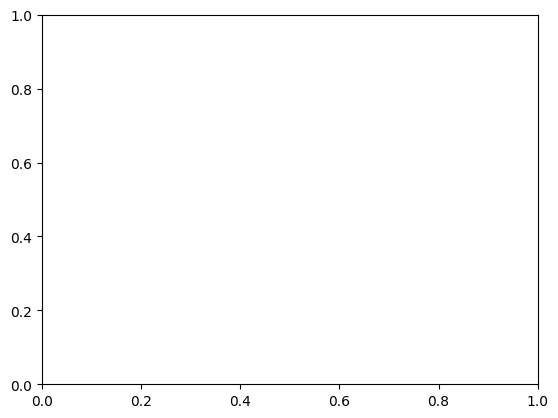

In [4]:
import matplotlib.pyplot as plt

plt.ion()  # turn on interactive mode
fig, ax = plt.subplots()

def plot(scores, nmean):
    %matplotlib inline # shows plots in the notebook

    ax.clear()
    ax.set_title("Training...")
    ax.set_xlabel("Number of Games")
    ax.set_ylabel("Score")
    ax.plot(scores, label="Score")
    ax.plot(nmean, label="Mean Score")
    ax.legend()
    fig.canvas.draw()
    plt.pause(0.001)  # updates the same window


# The main agent

Loaded model from ./model/modelv3.pth


/tmp/ipykernel_108294/3628026155.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  state = torch.tensor(state, dtype=torch.float)


Game 1 | Score 0 | Mean Score: 0.0 | Record: 0


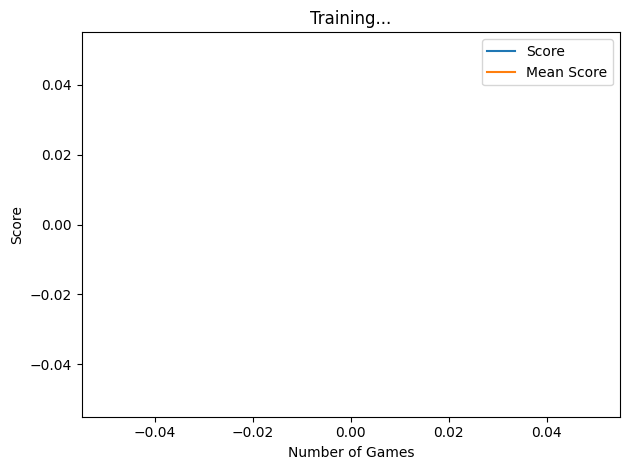

Game 2 | Score 0 | Mean Score: 0.0 | Record: 0


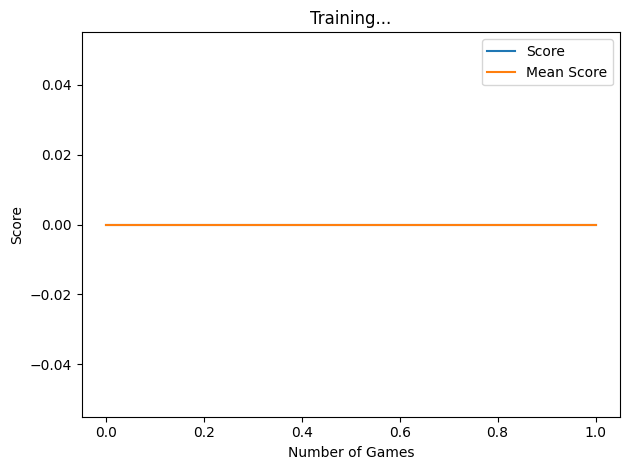

Game 3 | Score 3 | Mean Score: 1.0 | Record: 3


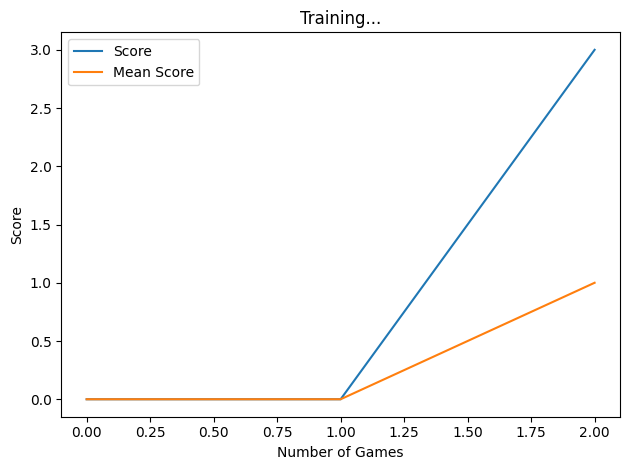

Game 4 | Score 1 | Mean Score: 1.0 | Record: 3


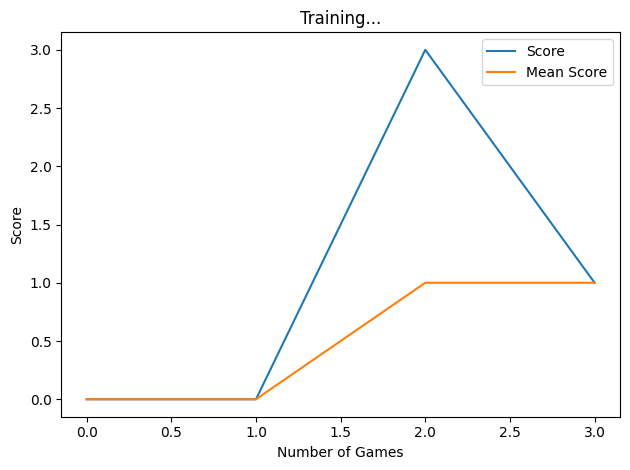

Game 5 | Score 1 | Mean Score: 1.0 | Record: 3


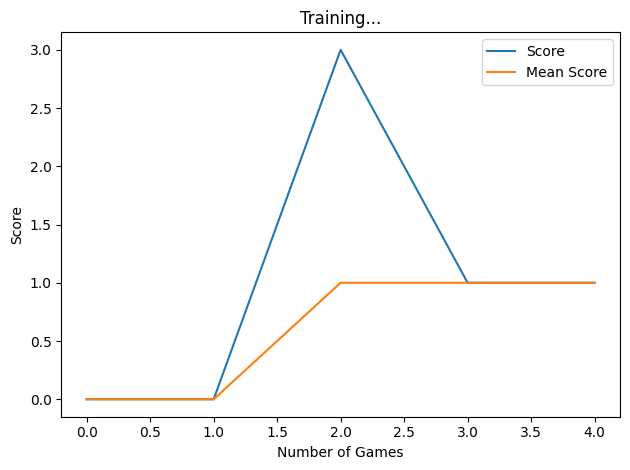

Game 6 | Score 0 | Mean Score: 0.8333333333333334 | Record: 3


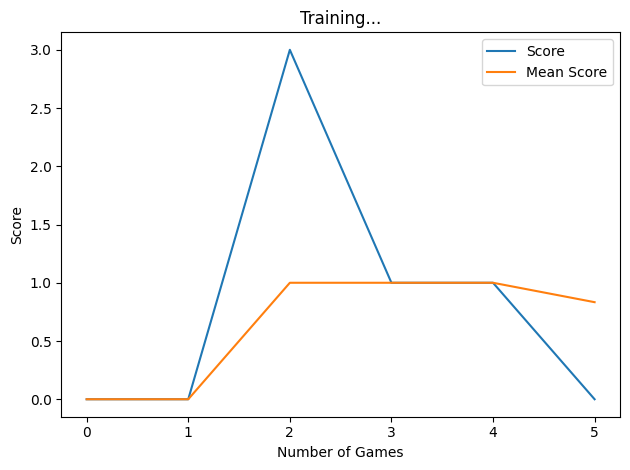

Game 7 | Score 1 | Mean Score: 0.8571428571428571 | Record: 3


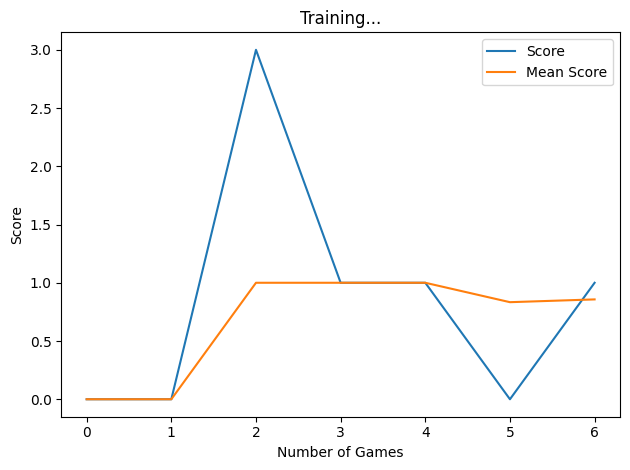

Game 8 | Score 1 | Mean Score: 0.875 | Record: 3


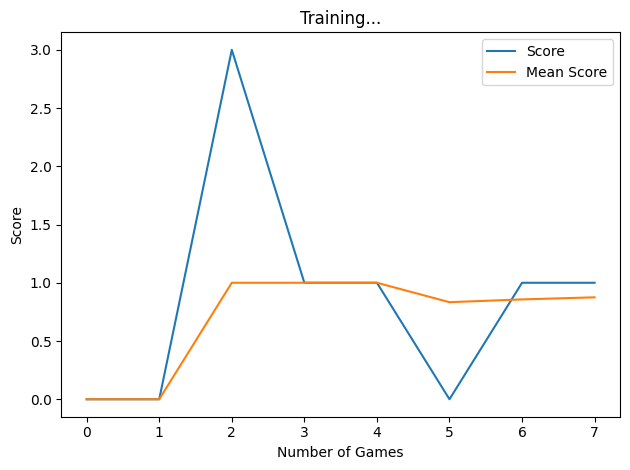

Game 9 | Score 0 | Mean Score: 0.7777777777777778 | Record: 3


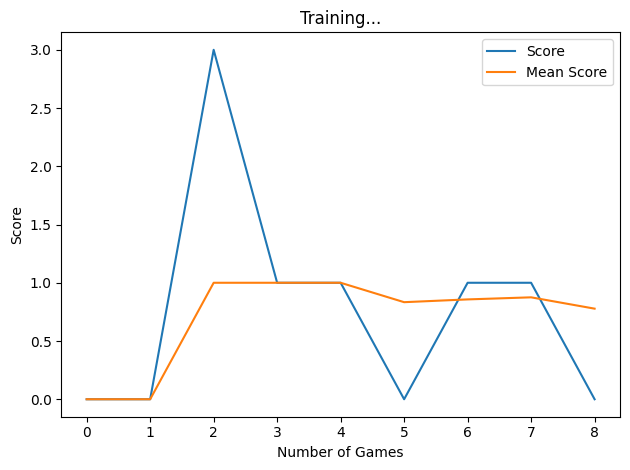

Game 10 | Score 2 | Mean Score: 0.9 | Record: 3


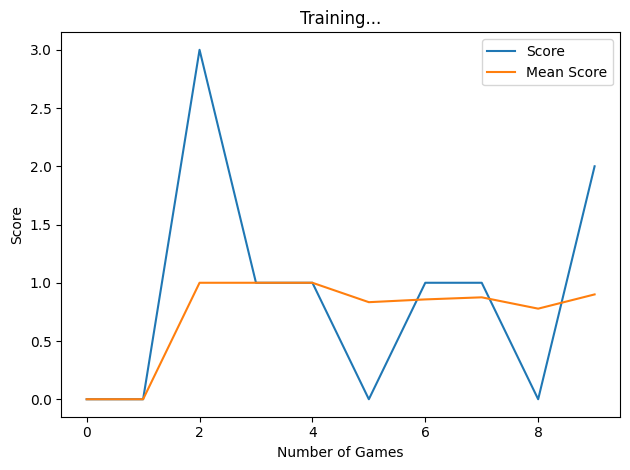

Game 11 | Score 2 | Mean Score: 1.0 | Record: 3


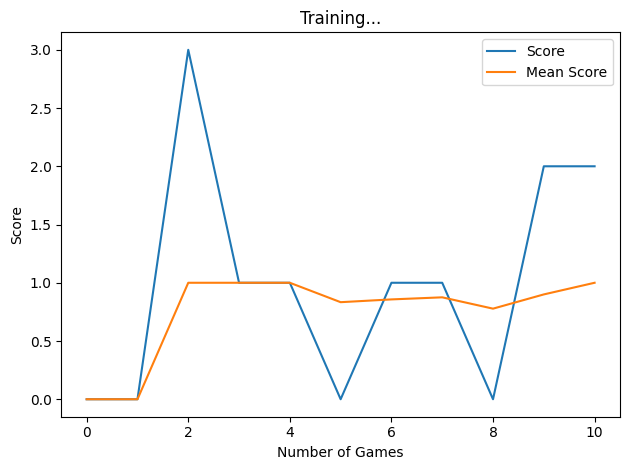

Game 12 | Score 1 | Mean Score: 1.0 | Record: 3


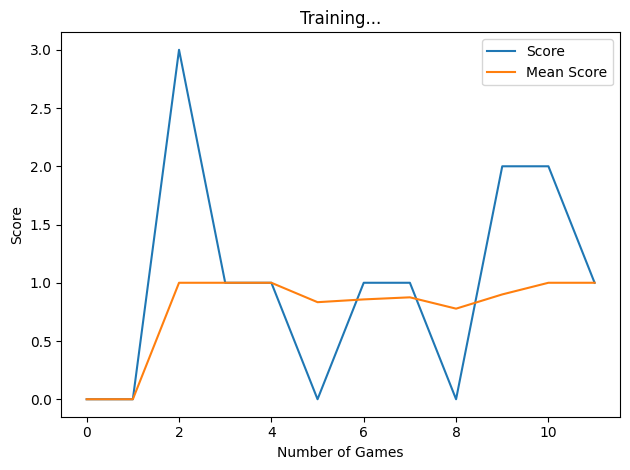

Game 13 | Score 1 | Mean Score: 1.0 | Record: 3


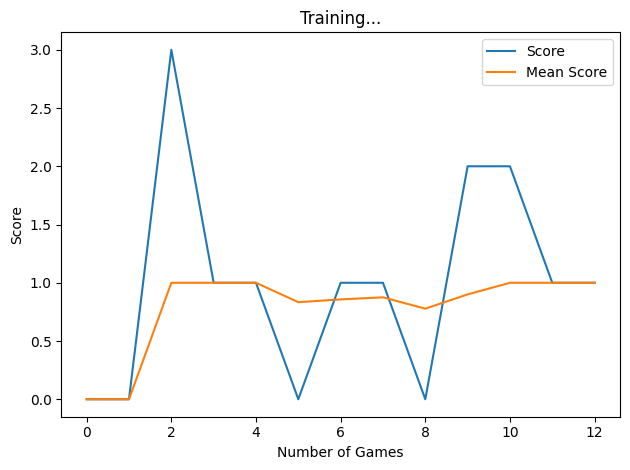

Game 14 | Score 1 | Mean Score: 1.0 | Record: 3


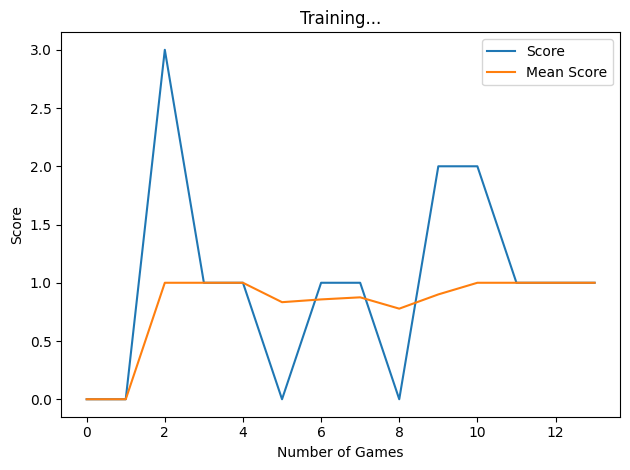

Game 15 | Score 4 | Mean Score: 1.2 | Record: 4


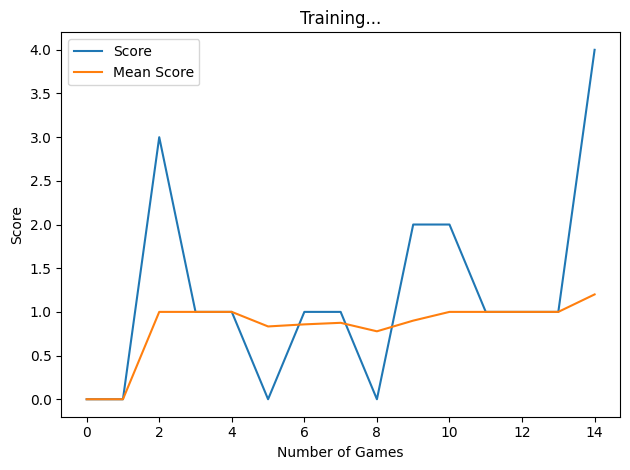

Game 16 | Score 1 | Mean Score: 1.1875 | Record: 4


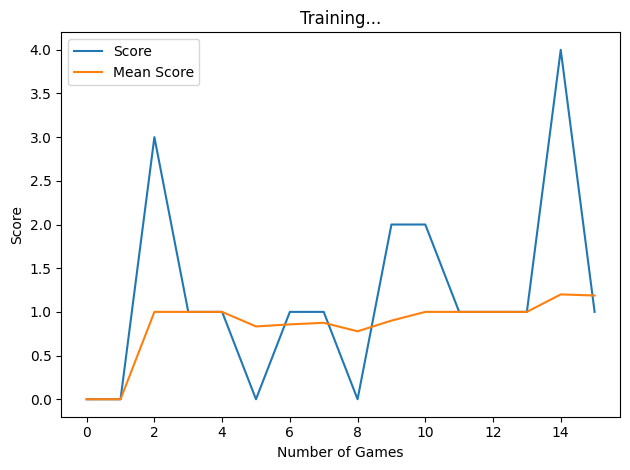

Game 17 | Score 4 | Mean Score: 1.3529411764705883 | Record: 4


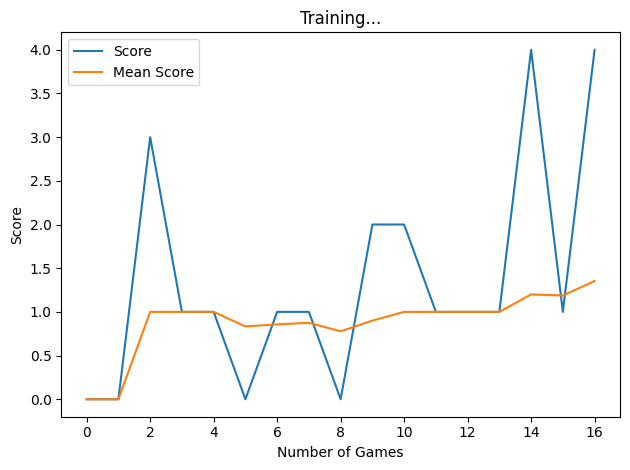

Game 18 | Score 0 | Mean Score: 1.2777777777777777 | Record: 4


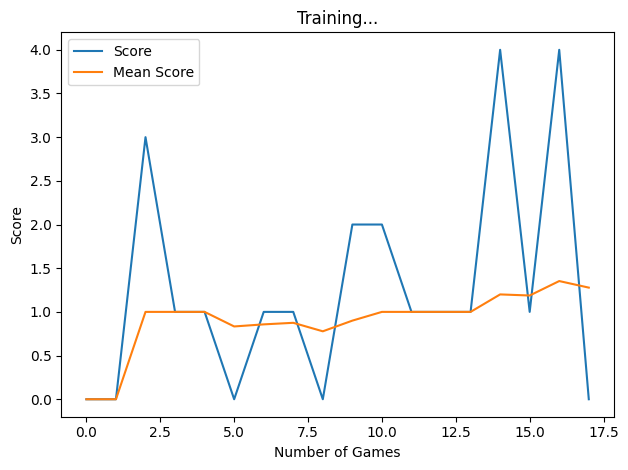

Game 19 | Score 3 | Mean Score: 1.368421052631579 | Record: 4


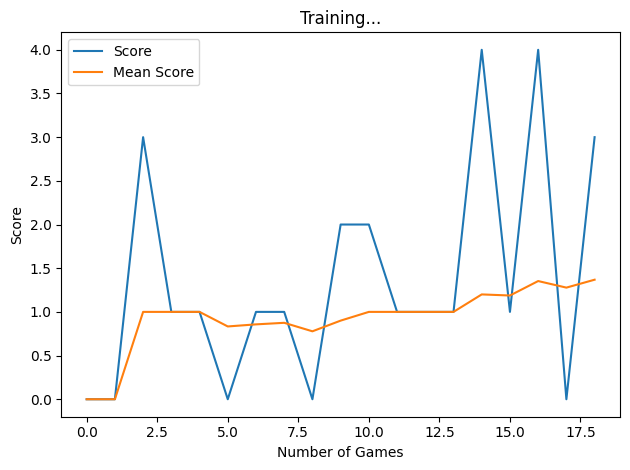

Game 20 | Score 1 | Mean Score: 1.35 | Record: 4


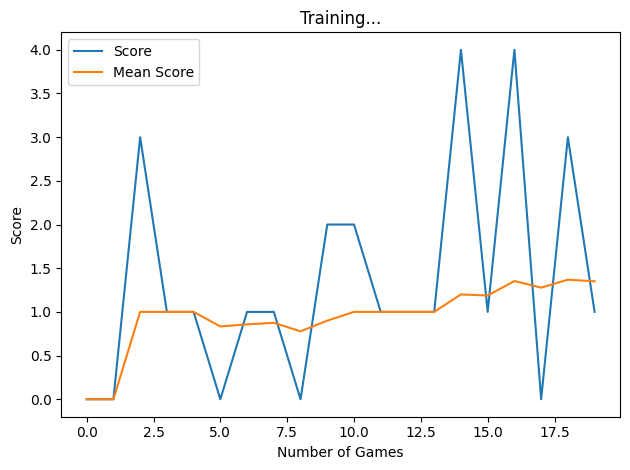

Game 21 | Score 1 | Mean Score: 1.3333333333333333 | Record: 4


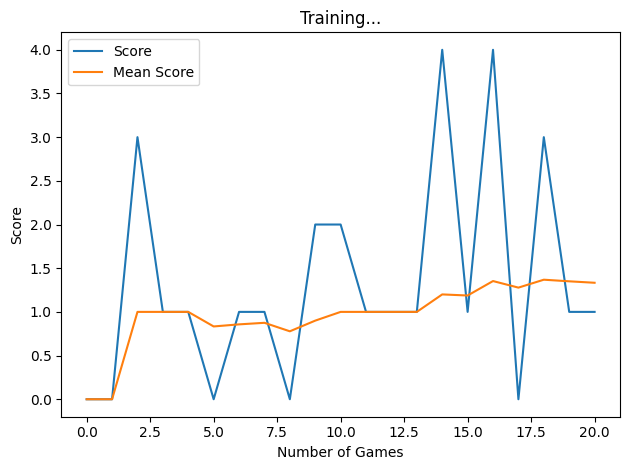

Game 22 | Score 1 | Mean Score: 1.3181818181818181 | Record: 4


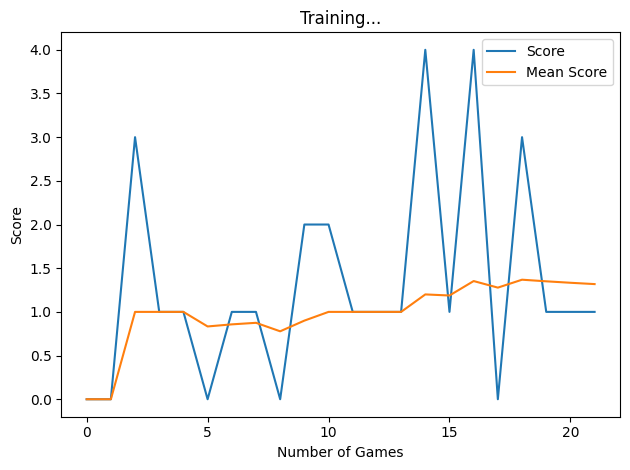

Game 23 | Score 1 | Mean Score: 1.3043478260869565 | Record: 4


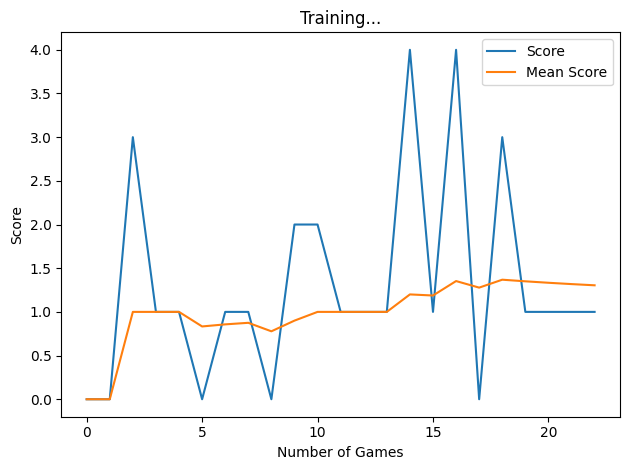

Game 24 | Score 1 | Mean Score: 1.2916666666666667 | Record: 4


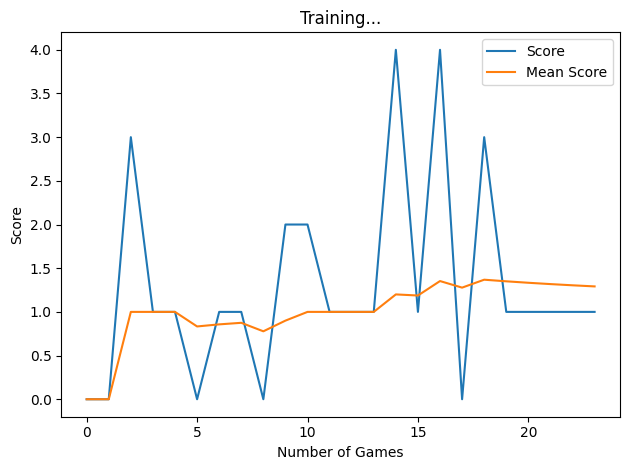

Game 25 | Score 0 | Mean Score: 1.24 | Record: 4


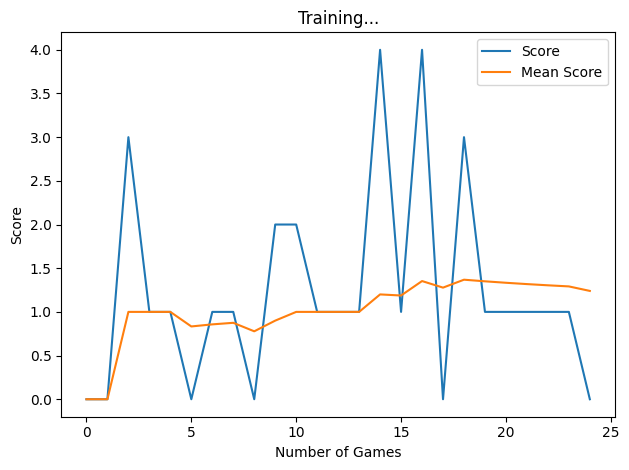

Game 26 | Score 1 | Mean Score: 1.2307692307692308 | Record: 4


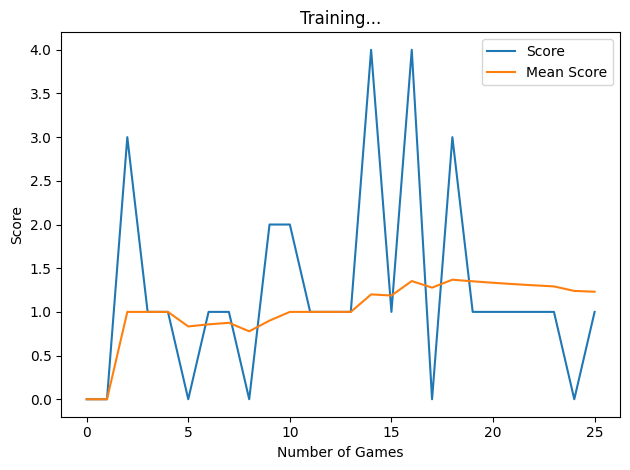

Game 27 | Score 1 | Mean Score: 1.2222222222222223 | Record: 4


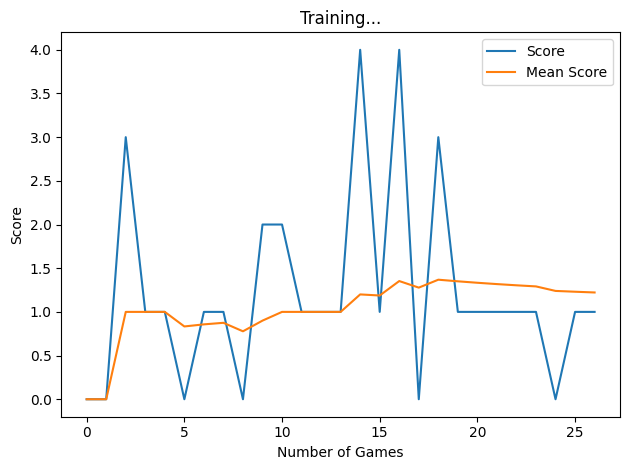

Game 28 | Score 1 | Mean Score: 1.2142857142857142 | Record: 4


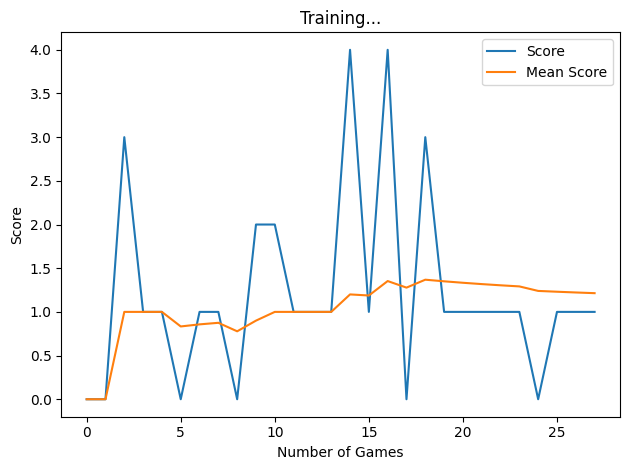

Game 29 | Score 2 | Mean Score: 1.2413793103448276 | Record: 4


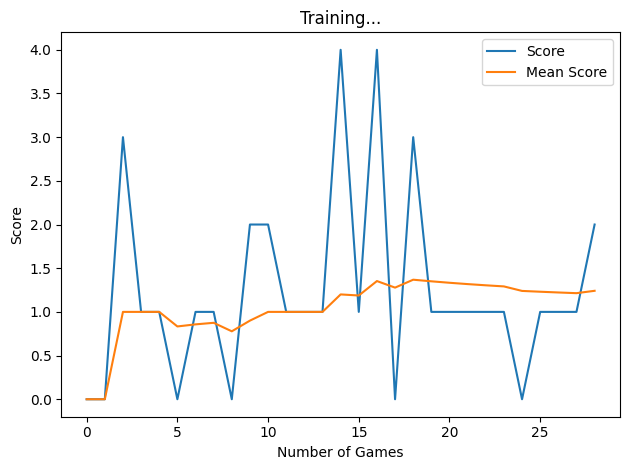

Game 30 | Score 2 | Mean Score: 1.2666666666666666 | Record: 4


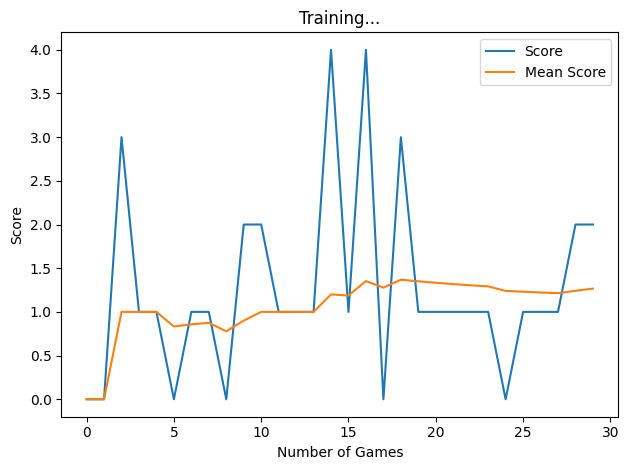

Game 31 | Score 1 | Mean Score: 1.2580645161290323 | Record: 4


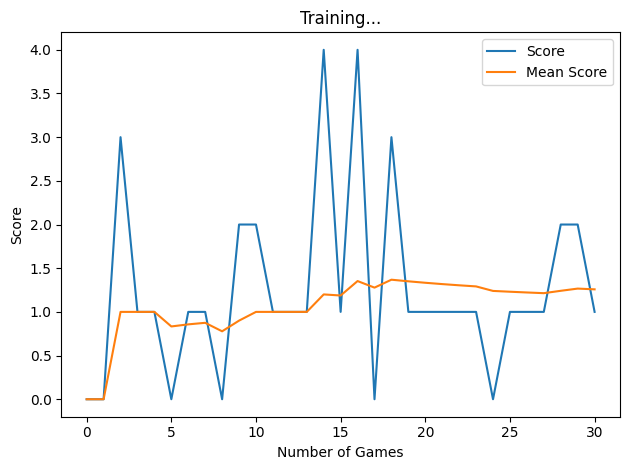

Game 32 | Score 2 | Mean Score: 1.28125 | Record: 4


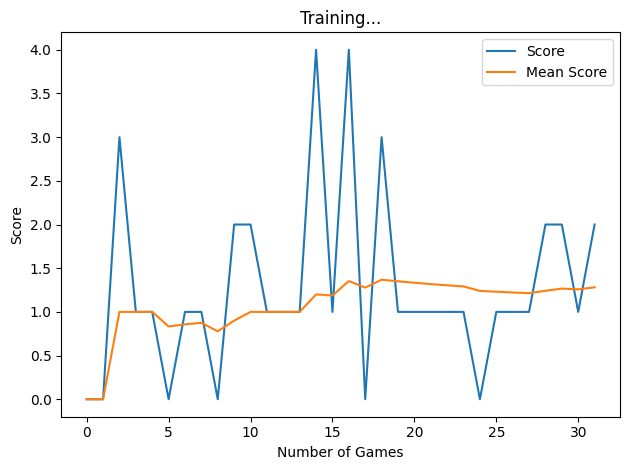

Game 33 | Score 1 | Mean Score: 1.2727272727272727 | Record: 4


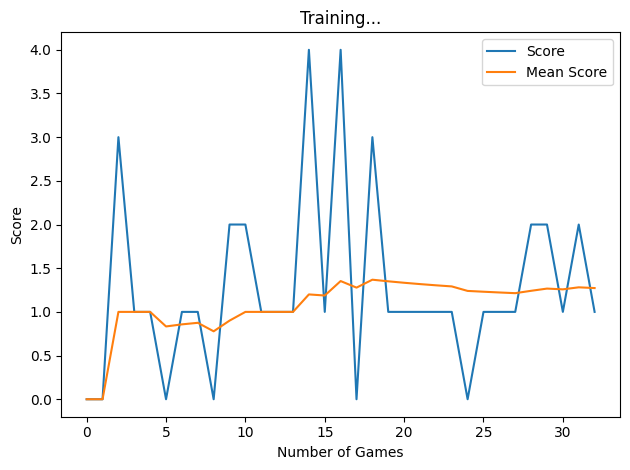

Game 34 | Score 3 | Mean Score: 1.3235294117647058 | Record: 4


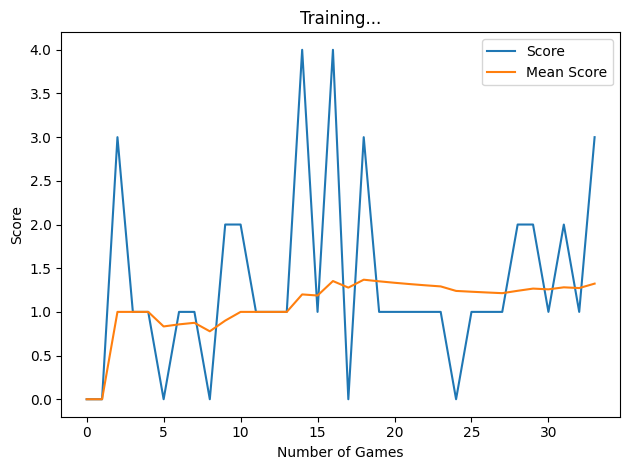

Game 35 | Score 1 | Mean Score: 1.3142857142857143 | Record: 4


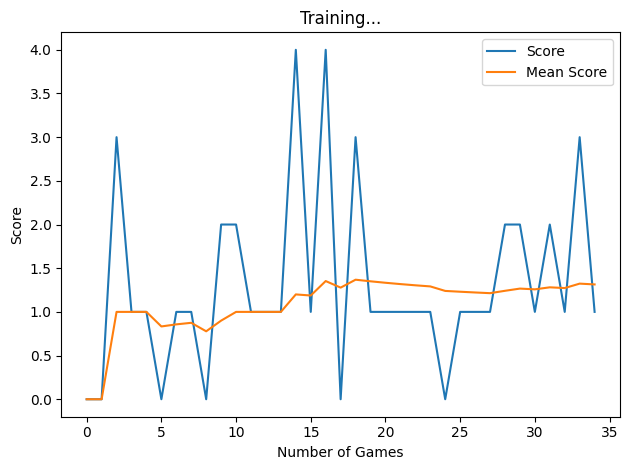

Game 36 | Score 0 | Mean Score: 1.2777777777777777 | Record: 4


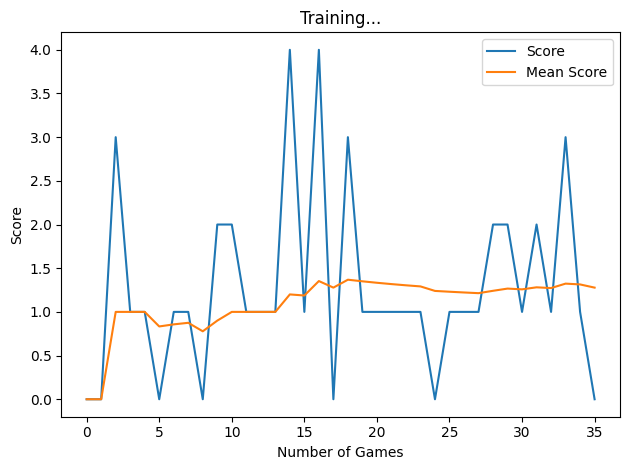

Game 37 | Score 1 | Mean Score: 1.2702702702702702 | Record: 4


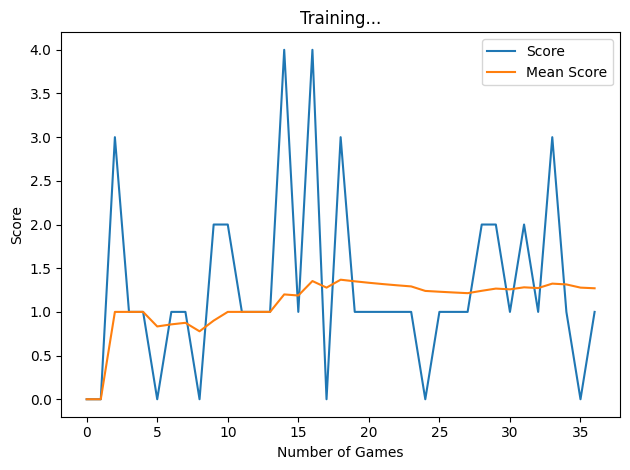

Game 38 | Score 5 | Mean Score: 1.368421052631579 | Record: 5


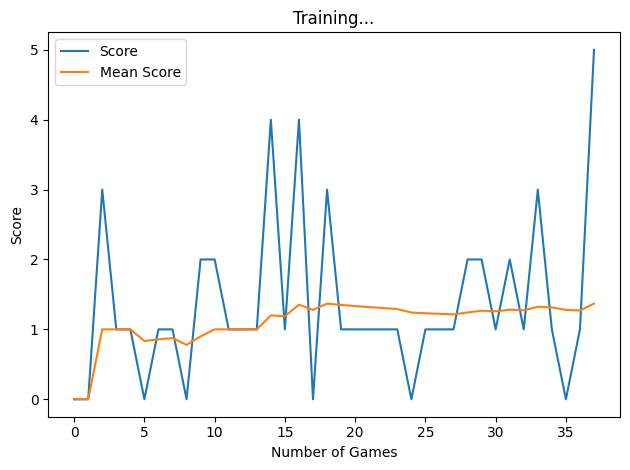

Game 39 | Score 2 | Mean Score: 1.3846153846153846 | Record: 5


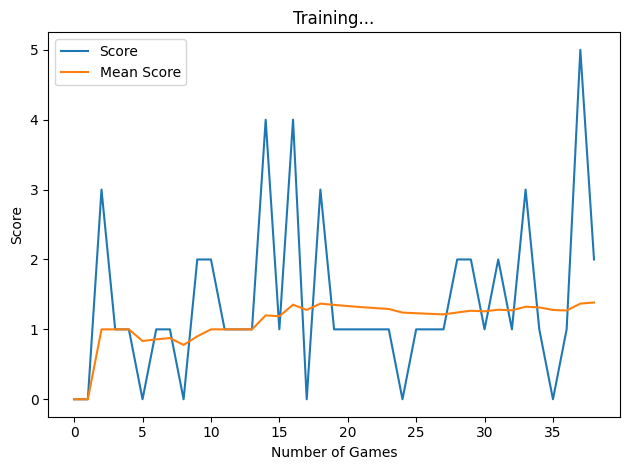

Game 40 | Score 4 | Mean Score: 1.45 | Record: 5


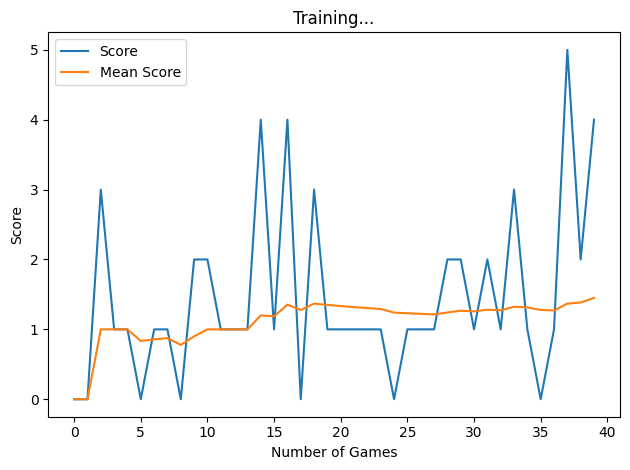

Game 41 | Score 1 | Mean Score: 1.4390243902439024 | Record: 5


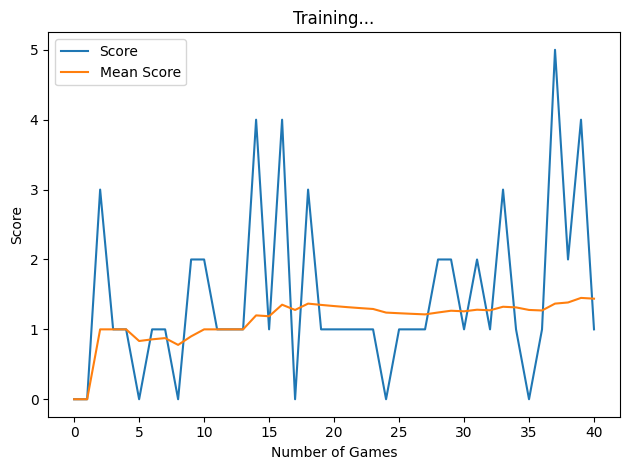

Game 42 | Score 4 | Mean Score: 1.5 | Record: 5


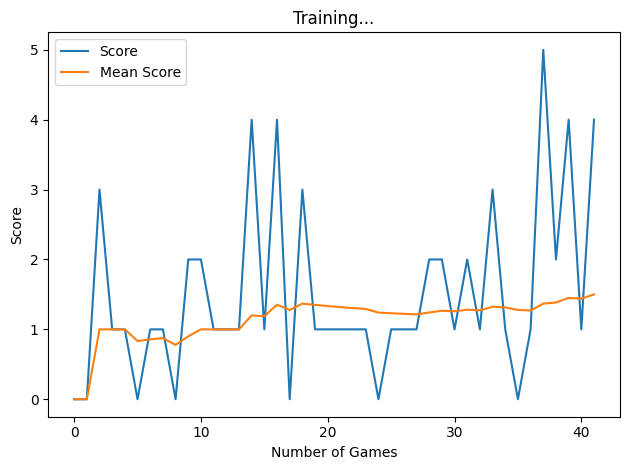

Game 43 | Score 1 | Mean Score: 1.4883720930232558 | Record: 5


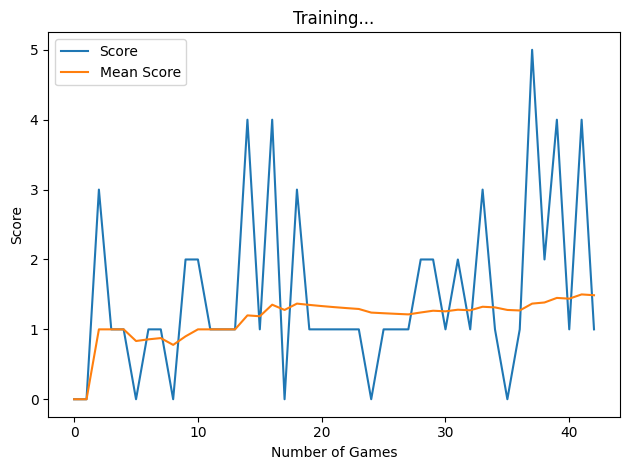

Game 44 | Score 2 | Mean Score: 1.5 | Record: 5


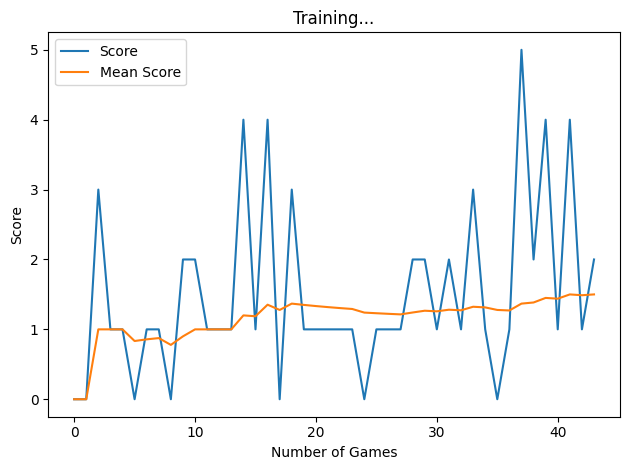

Game 45 | Score 4 | Mean Score: 1.5555555555555556 | Record: 5


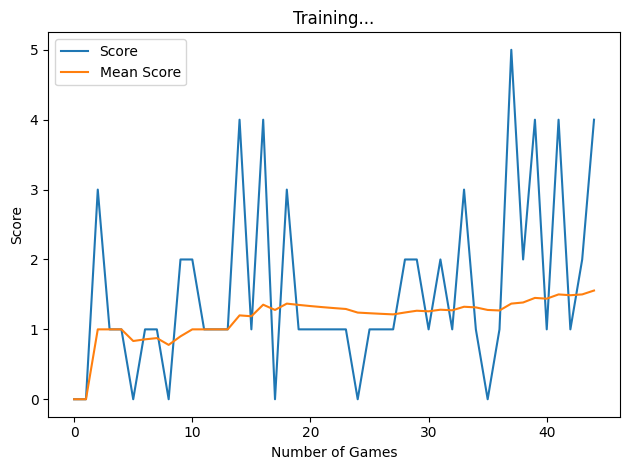

Game 46 | Score 3 | Mean Score: 1.5869565217391304 | Record: 5


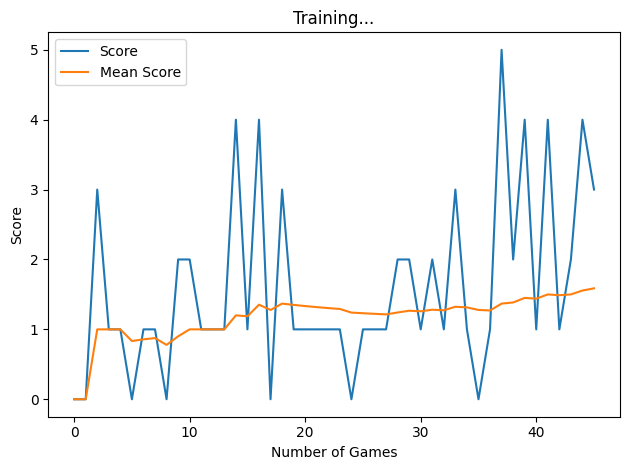

Game 47 | Score 0 | Mean Score: 1.553191489361702 | Record: 5


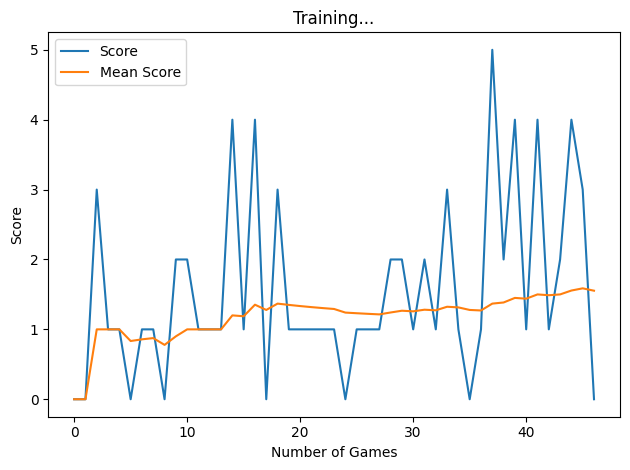

Game 48 | Score 7 | Mean Score: 1.6666666666666667 | Record: 7


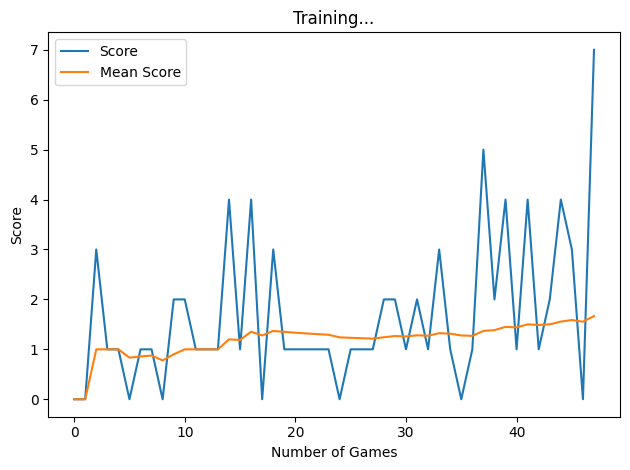

Game 49 | Score 7 | Mean Score: 1.7755102040816326 | Record: 7


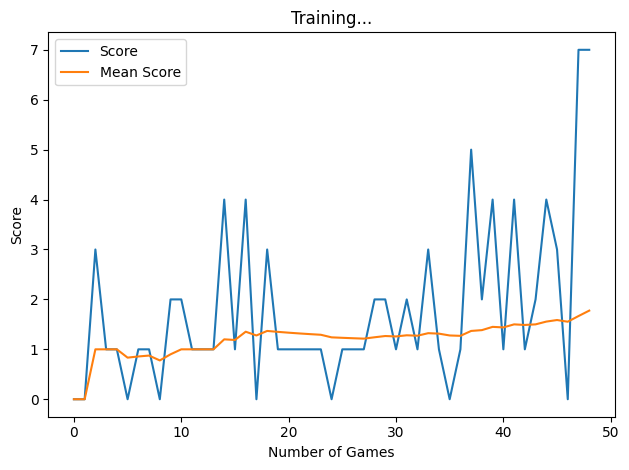

Game 50 | Score 3 | Mean Score: 1.8 | Record: 7


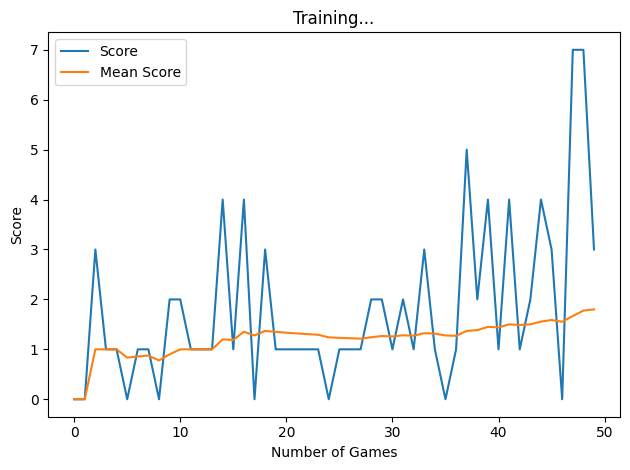

Game 51 | Score 1 | Mean Score: 1.7843137254901962 | Record: 7


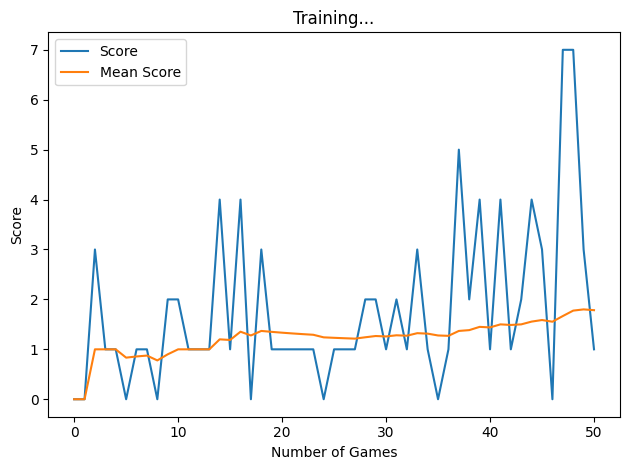

Game 52 | Score 1 | Mean Score: 1.7692307692307692 | Record: 7


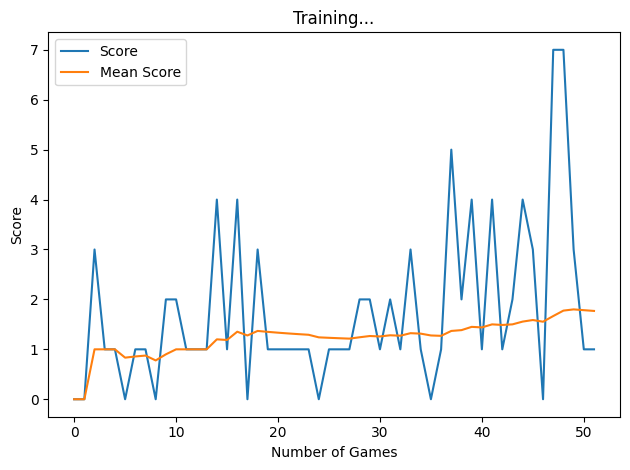

Game 53 | Score 1 | Mean Score: 1.7547169811320755 | Record: 7


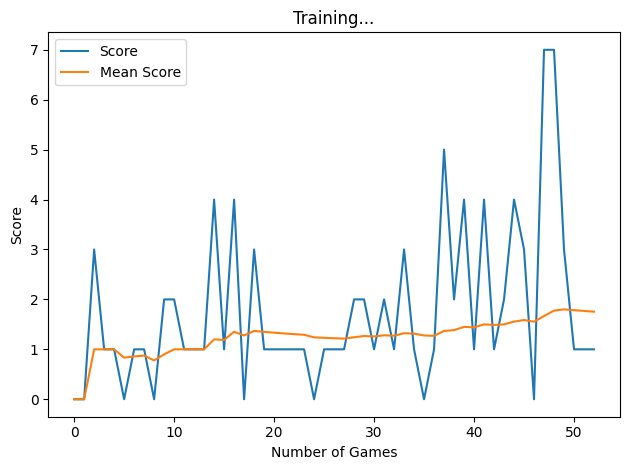

Game 54 | Score 4 | Mean Score: 1.7962962962962963 | Record: 7


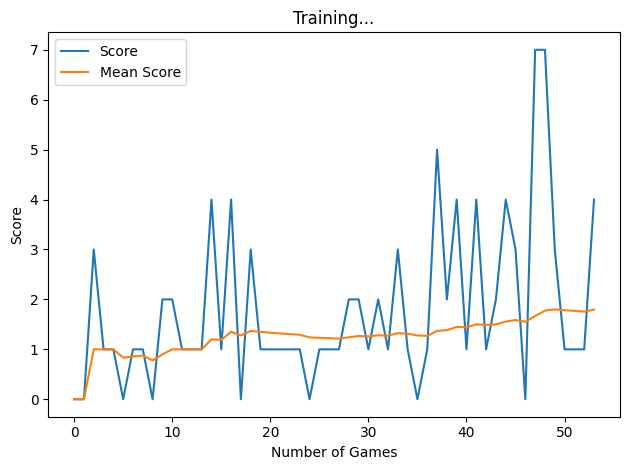

Game 55 | Score 0 | Mean Score: 1.7636363636363637 | Record: 7


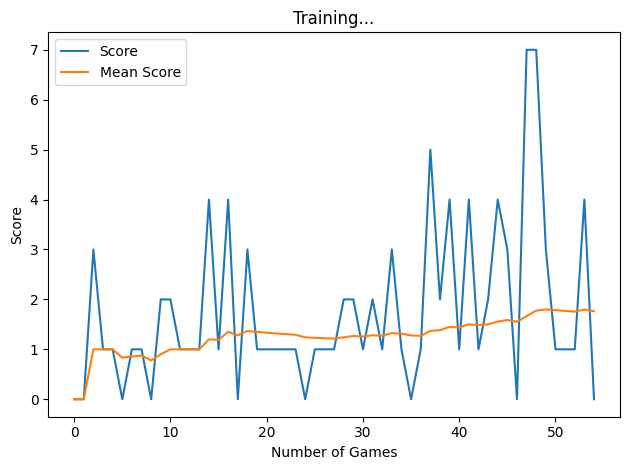

Game 56 | Score 9 | Mean Score: 1.8928571428571428 | Record: 9


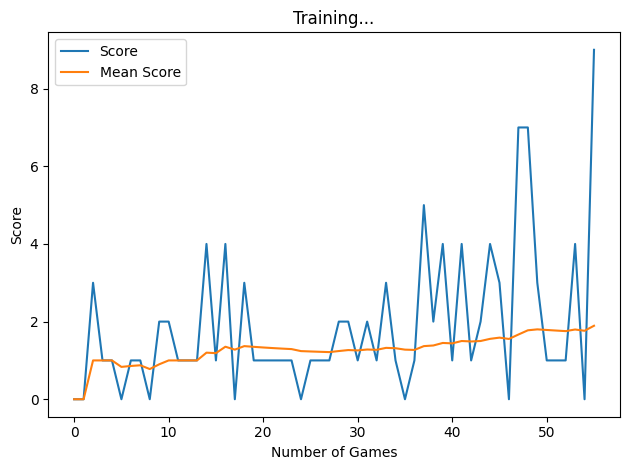

Game 57 | Score 5 | Mean Score: 1.9473684210526316 | Record: 9


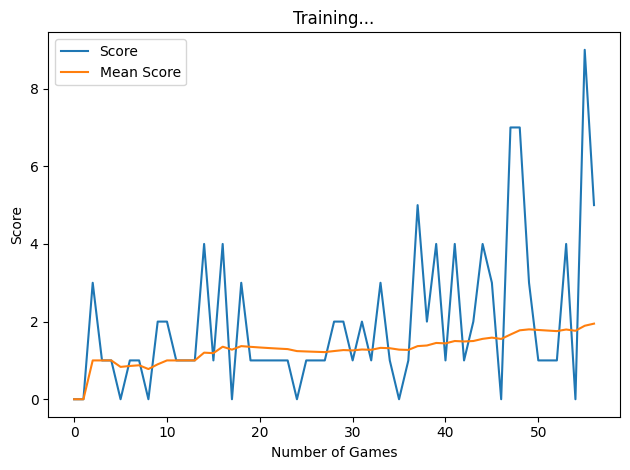

Game 58 | Score 2 | Mean Score: 1.9482758620689655 | Record: 9


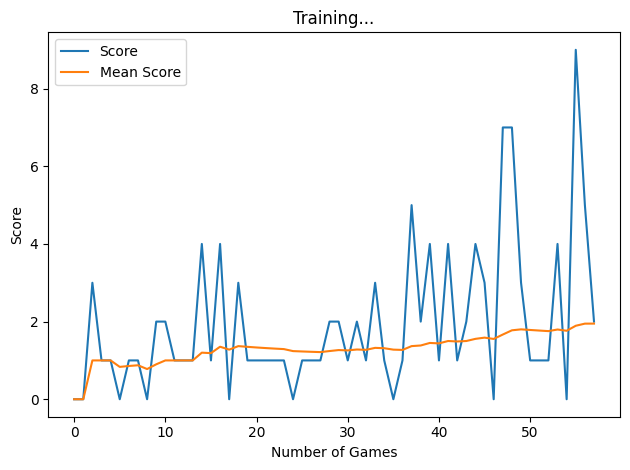

Game 59 | Score 7 | Mean Score: 2.0338983050847457 | Record: 9


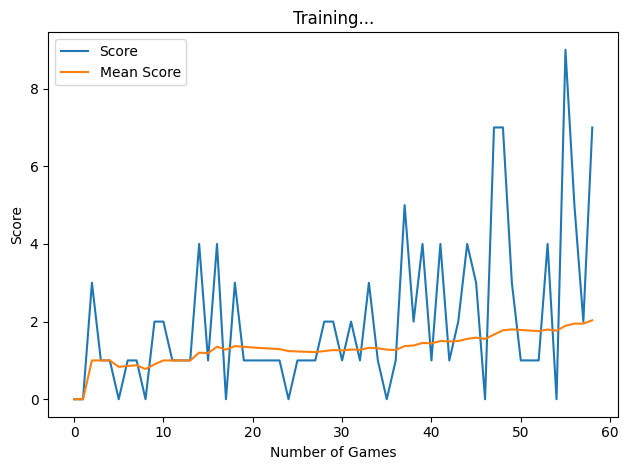

Game 60 | Score 2 | Mean Score: 2.033333333333333 | Record: 9


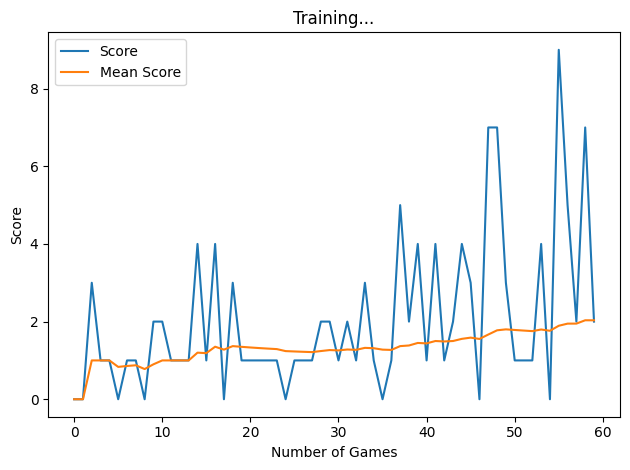

Game 61 | Score 3 | Mean Score: 2.0491803278688523 | Record: 9


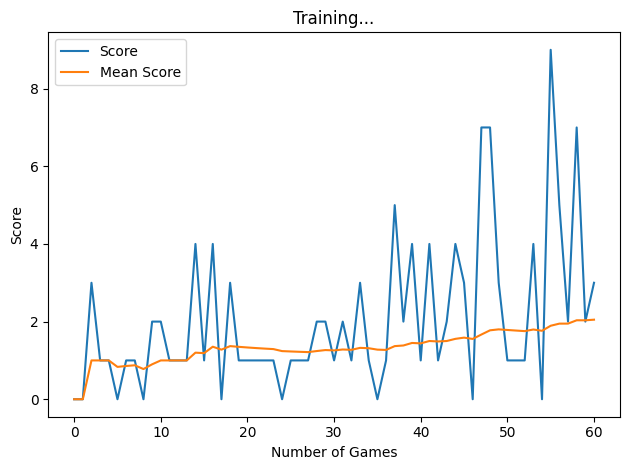

Game 62 | Score 6 | Mean Score: 2.1129032258064515 | Record: 9


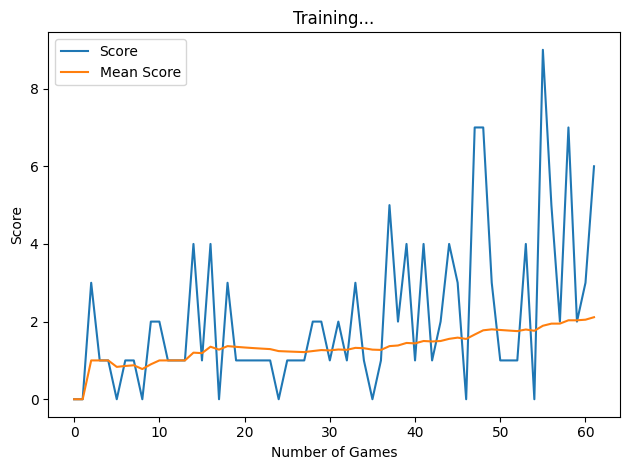

Game 63 | Score 4 | Mean Score: 2.142857142857143 | Record: 9


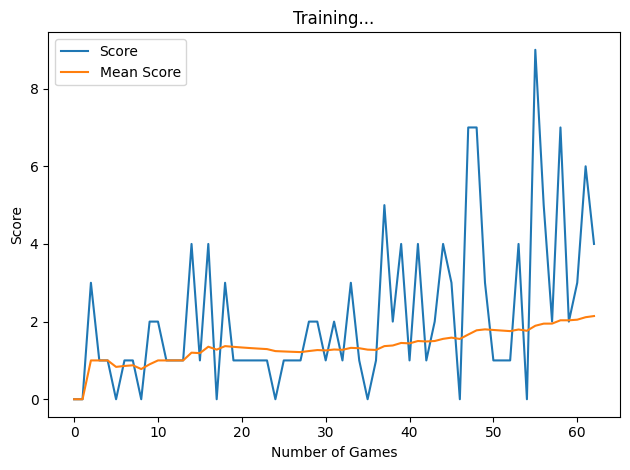

Game 64 | Score 0 | Mean Score: 2.109375 | Record: 9


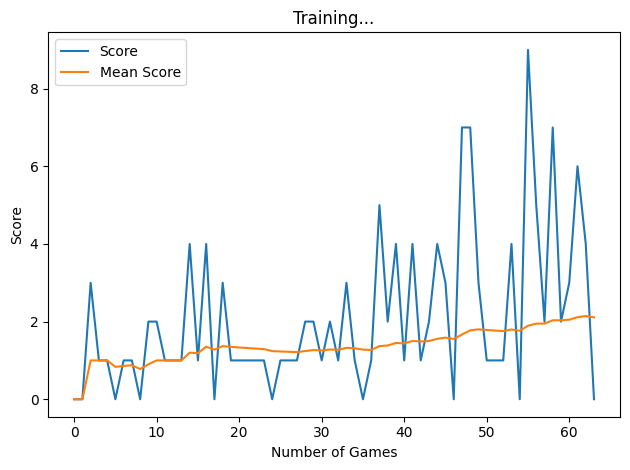

Game 65 | Score 5 | Mean Score: 2.1538461538461537 | Record: 9


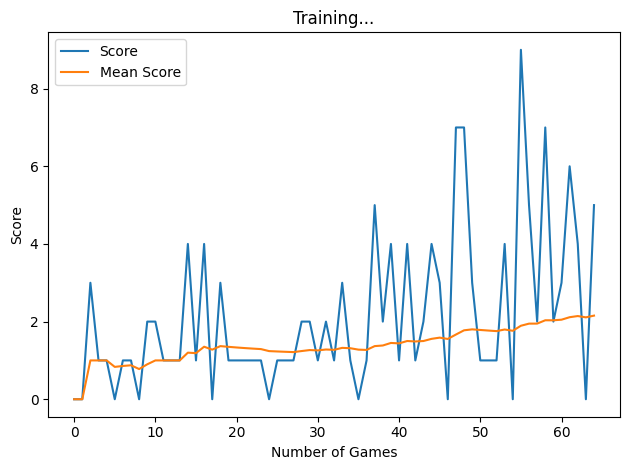

Game 66 | Score 4 | Mean Score: 2.1818181818181817 | Record: 9


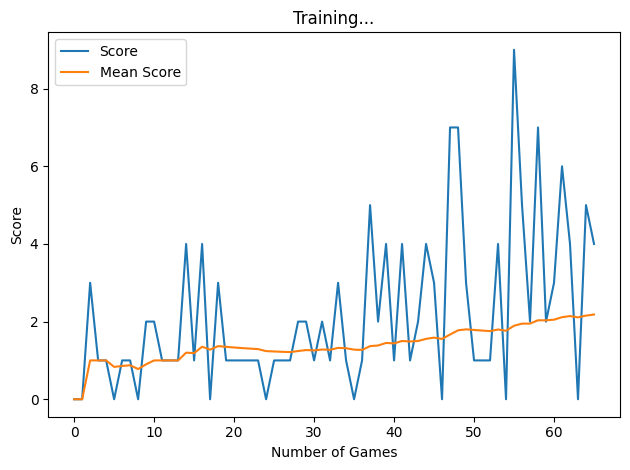

Game 67 | Score 1 | Mean Score: 2.1641791044776117 | Record: 9


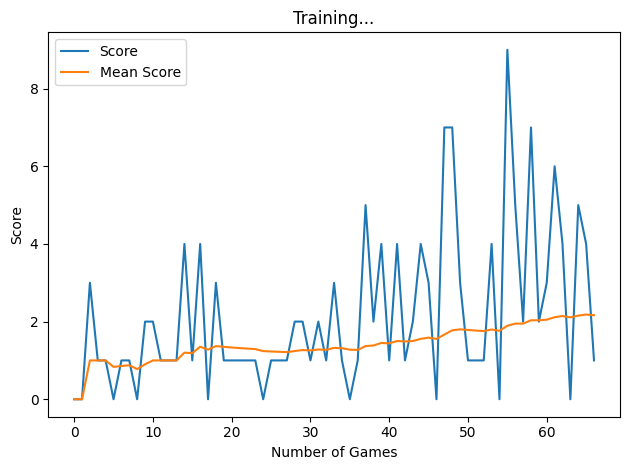

Game 68 | Score 6 | Mean Score: 2.2205882352941178 | Record: 9


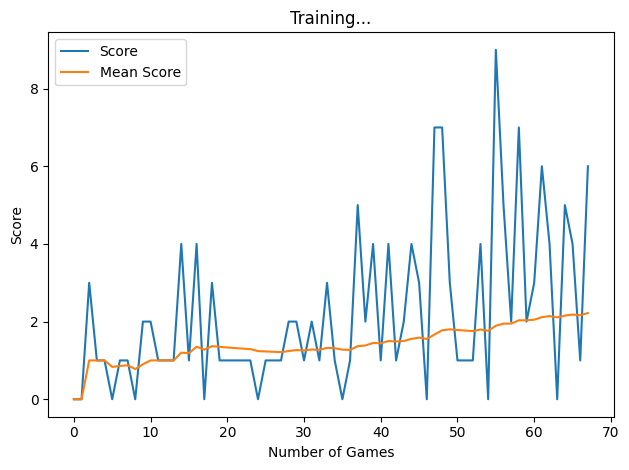

Game 69 | Score 4 | Mean Score: 2.246376811594203 | Record: 9


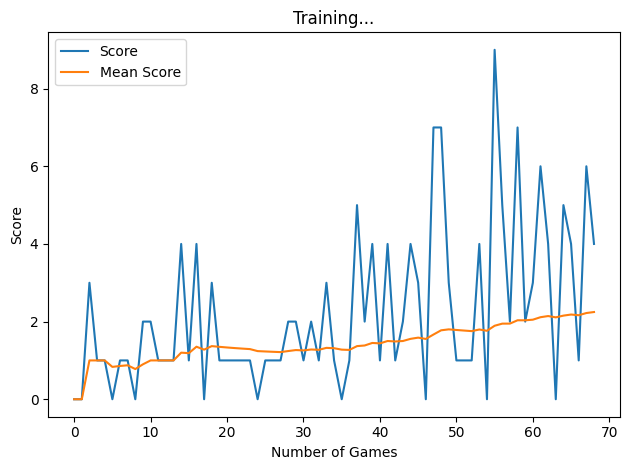

Game 70 | Score 3 | Mean Score: 2.257142857142857 | Record: 9


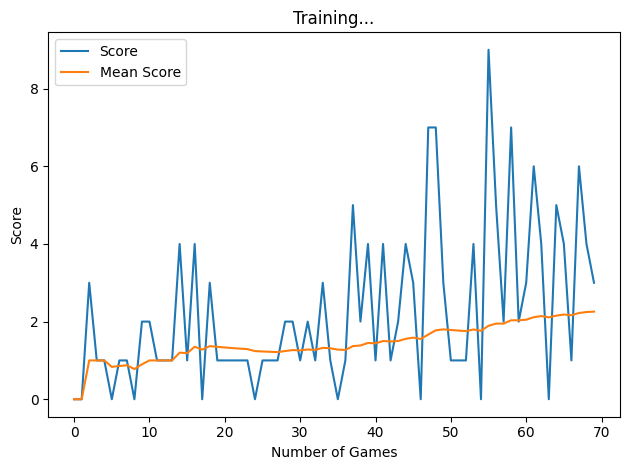

Game 71 | Score 1 | Mean Score: 2.23943661971831 | Record: 9


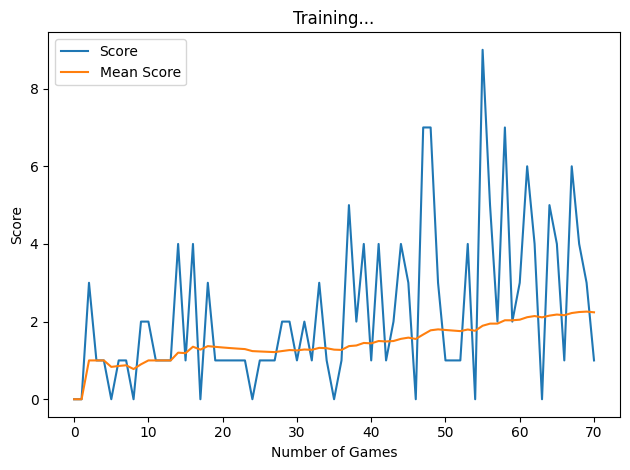

Game 72 | Score 4 | Mean Score: 2.263888888888889 | Record: 9


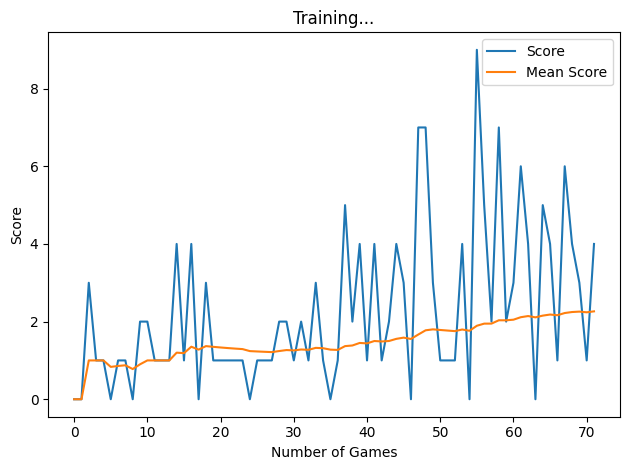

Game 73 | Score 17 | Mean Score: 2.4657534246575343 | Record: 17


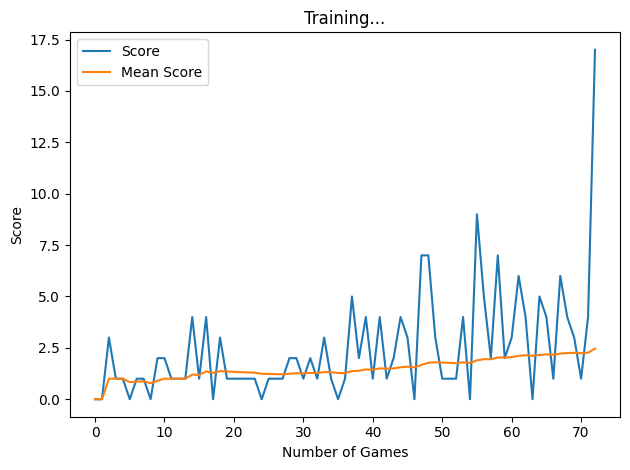

Game 74 | Score 18 | Mean Score: 2.675675675675676 | Record: 18


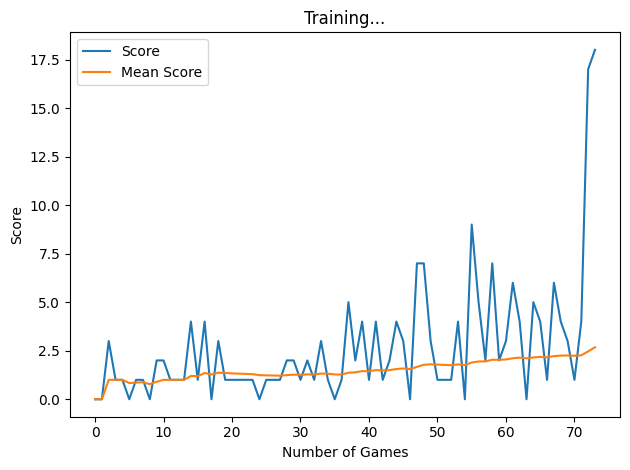

Game 75 | Score 24 | Mean Score: 2.96 | Record: 24


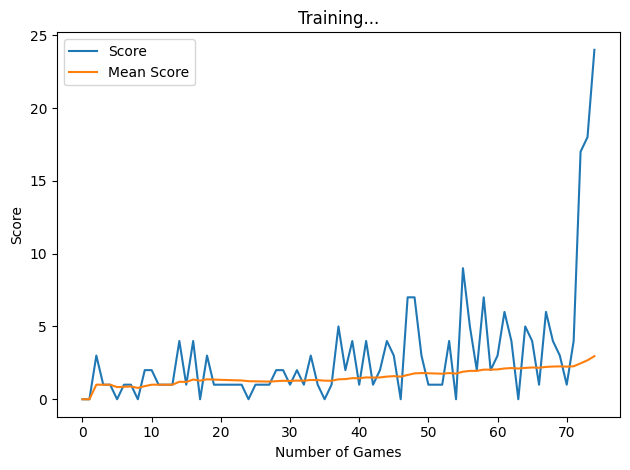

Game 76 | Score 13 | Mean Score: 3.0921052631578947 | Record: 24


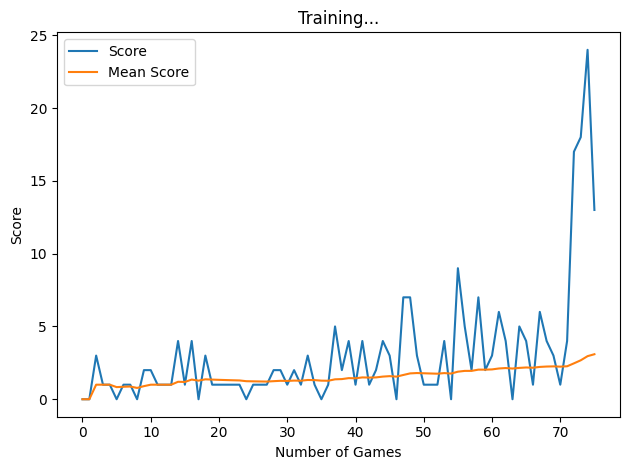

Game 77 | Score 24 | Mean Score: 3.3636363636363638 | Record: 24


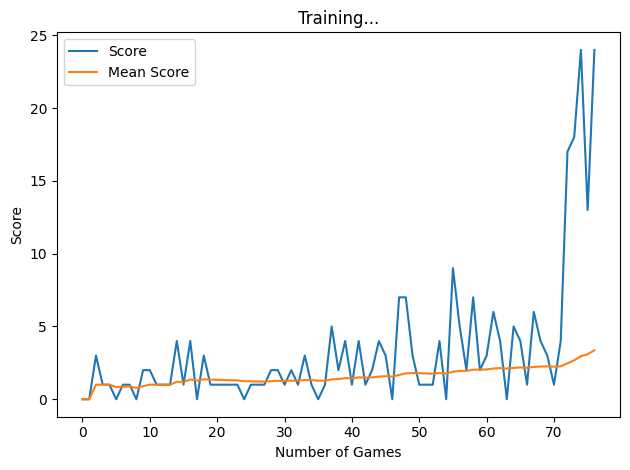

Game 78 | Score 21 | Mean Score: 3.58974358974359 | Record: 24


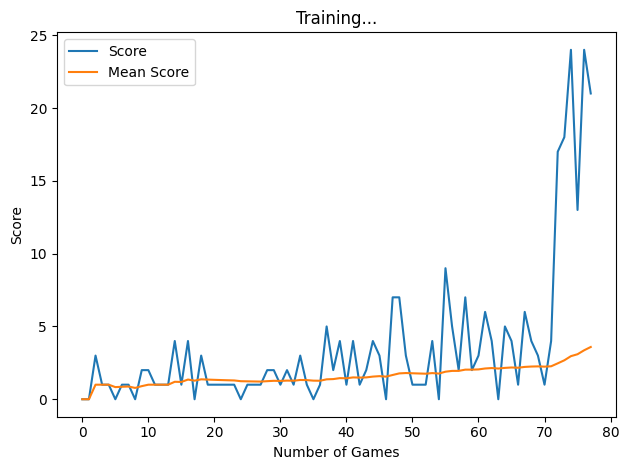

Game 79 | Score 44 | Mean Score: 4.10126582278481 | Record: 44


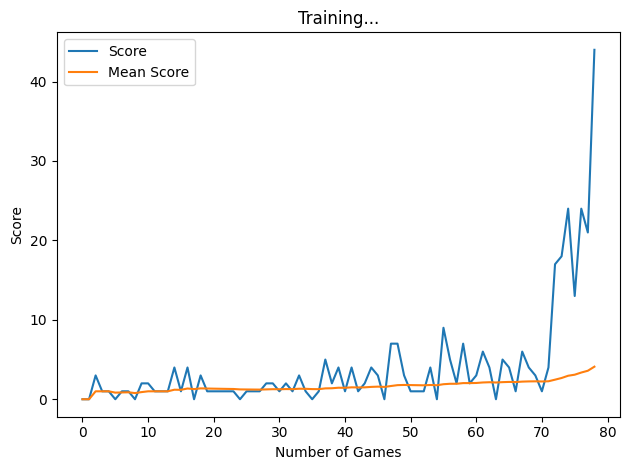

Game 80 | Score 32 | Mean Score: 4.45 | Record: 44


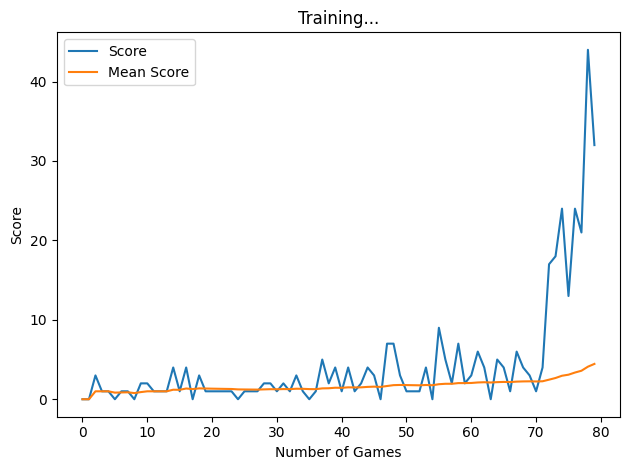

Game 81 | Score 32 | Mean Score: 4.790123456790123 | Record: 44


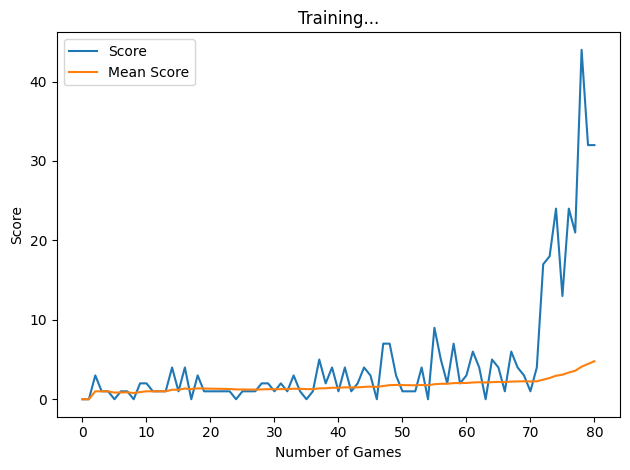

Game 82 | Score 12 | Mean Score: 4.878048780487805 | Record: 44


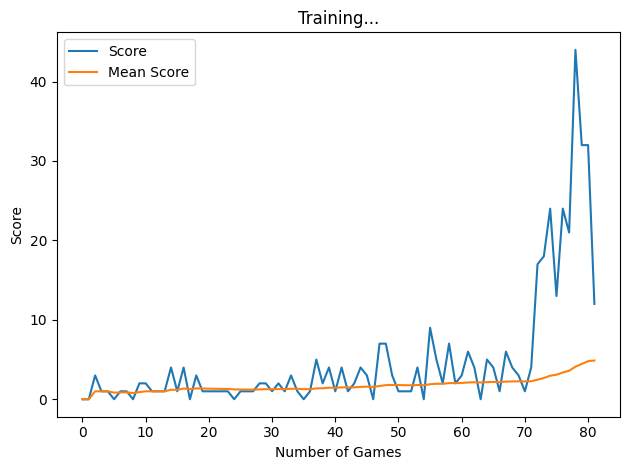

Game 83 | Score 18 | Mean Score: 5.036144578313253 | Record: 44


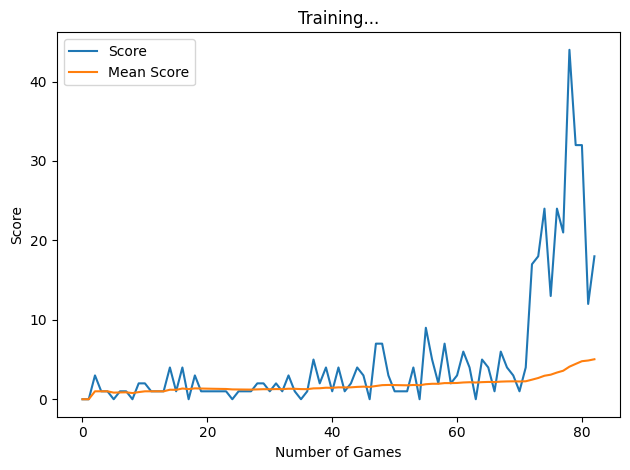

Game 84 | Score 44 | Mean Score: 5.5 | Record: 44


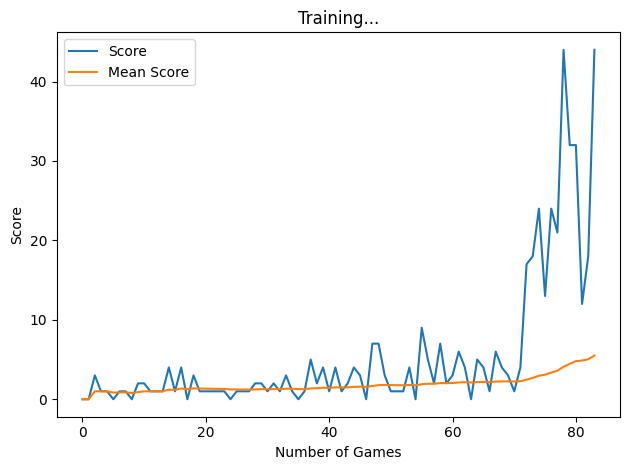

Game 85 | Score 45 | Mean Score: 5.964705882352941 | Record: 45


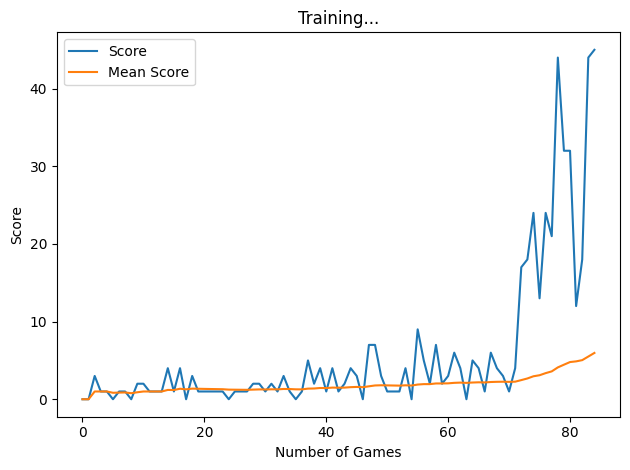

Game 86 | Score 46 | Mean Score: 6.430232558139535 | Record: 46


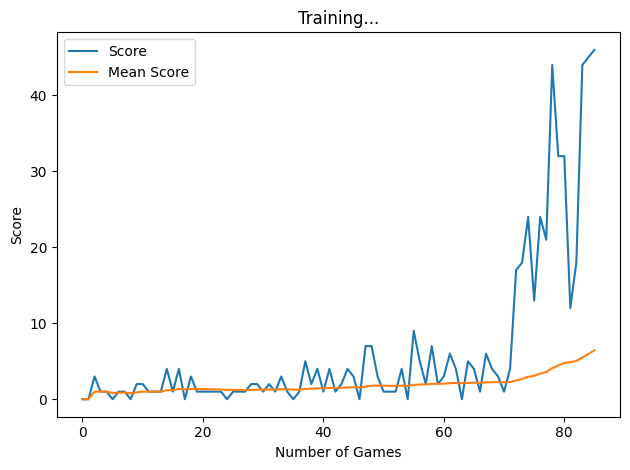

Game 87 | Score 32 | Mean Score: 6.724137931034483 | Record: 46


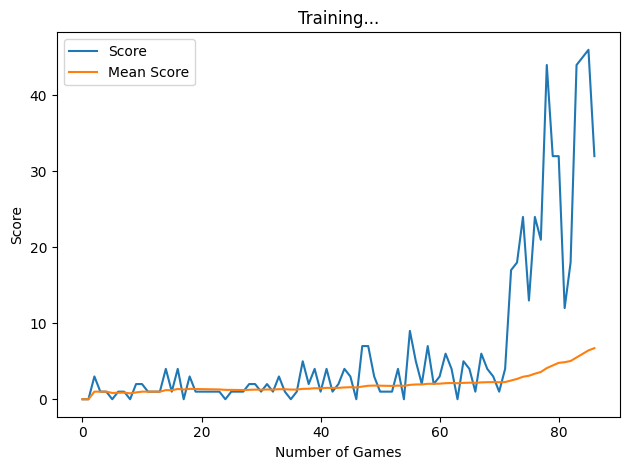

Game 88 | Score 26 | Mean Score: 6.943181818181818 | Record: 46


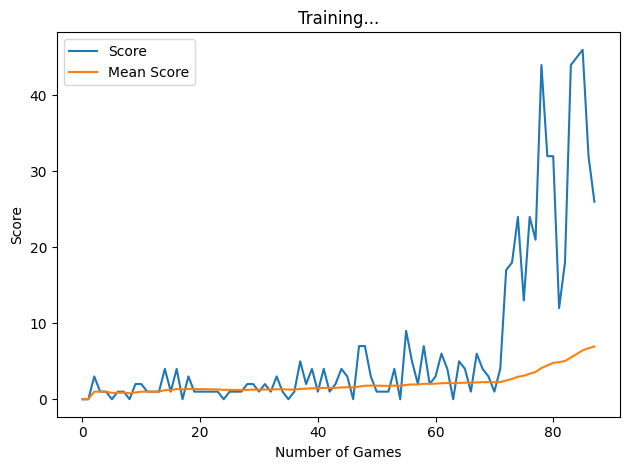

Game 89 | Score 45 | Mean Score: 7.370786516853933 | Record: 46


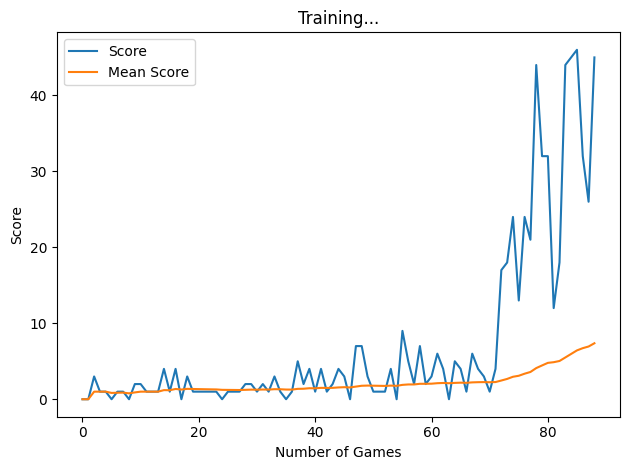

Game 90 | Score 29 | Mean Score: 7.611111111111111 | Record: 46


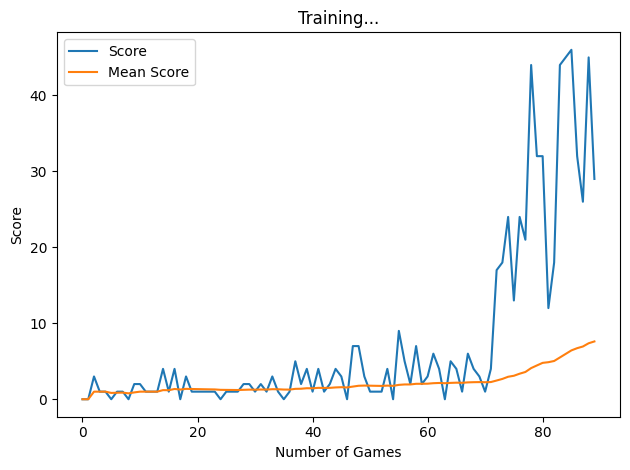

Game 91 | Score 32 | Mean Score: 7.8791208791208796 | Record: 46


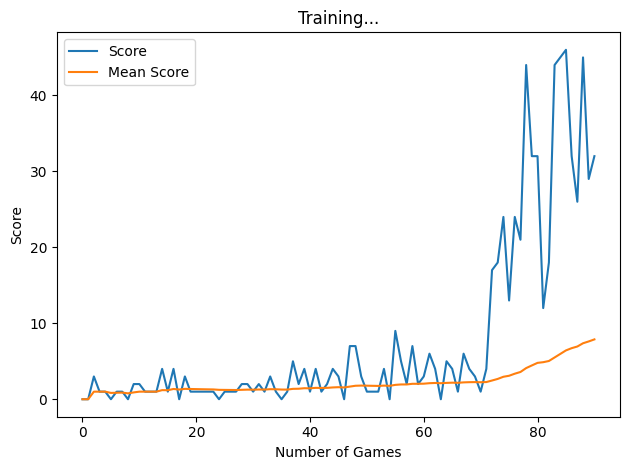

Game 92 | Score 33 | Mean Score: 8.152173913043478 | Record: 46


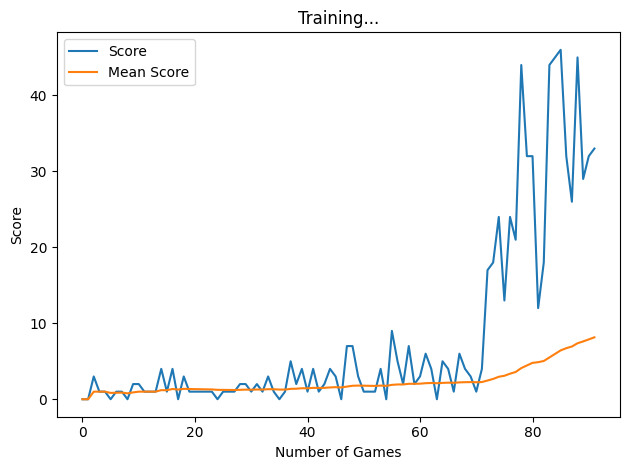

Game 93 | Score 46 | Mean Score: 8.559139784946236 | Record: 46


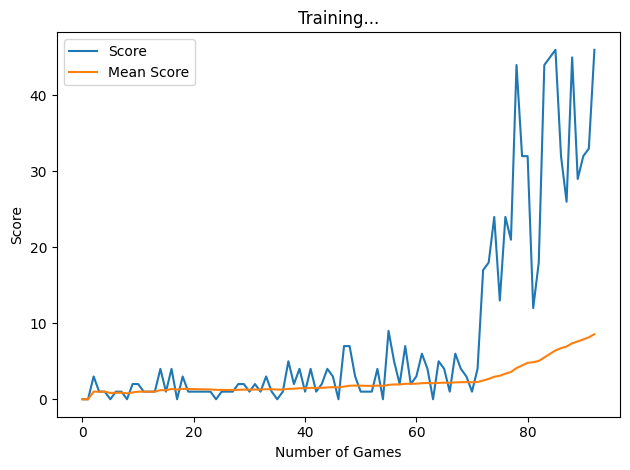

Game 94 | Score 69 | Mean Score: 9.202127659574469 | Record: 69


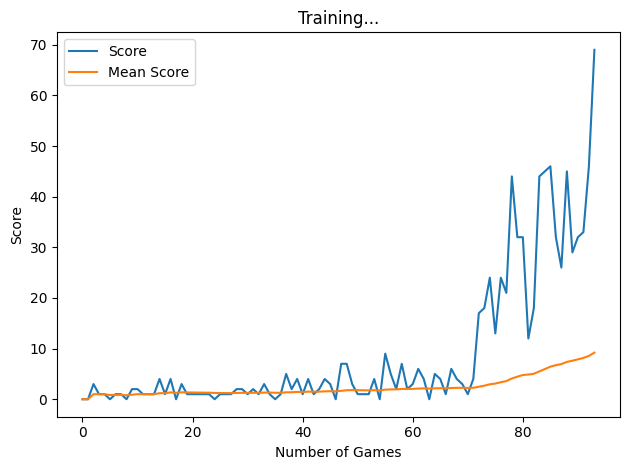

Game 95 | Score 24 | Mean Score: 9.357894736842105 | Record: 69


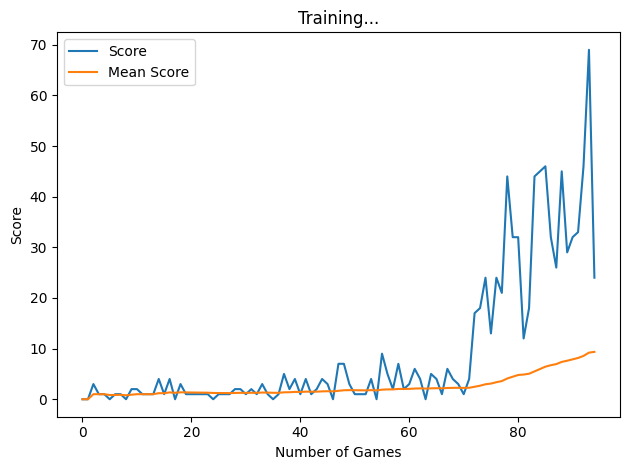

Game 96 | Score 55 | Mean Score: 9.833333333333334 | Record: 69


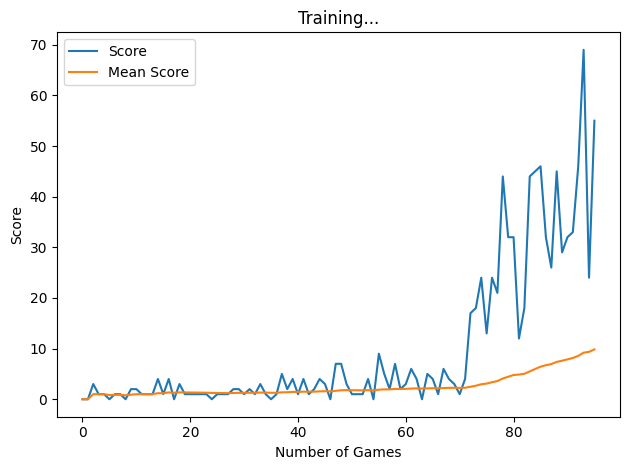

Game 97 | Score 34 | Mean Score: 10.082474226804123 | Record: 69


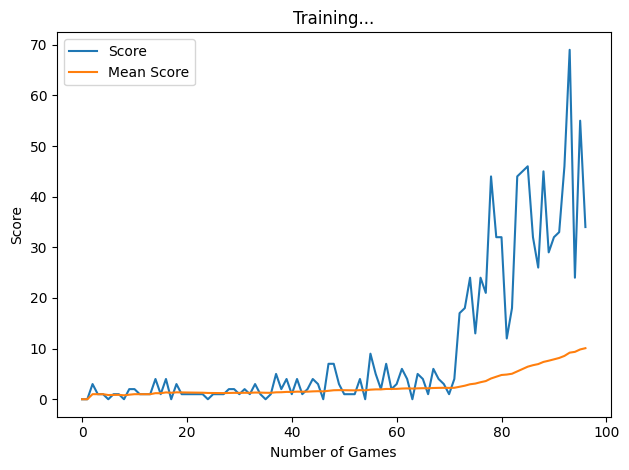

Game 98 | Score 51 | Mean Score: 10.5 | Record: 69


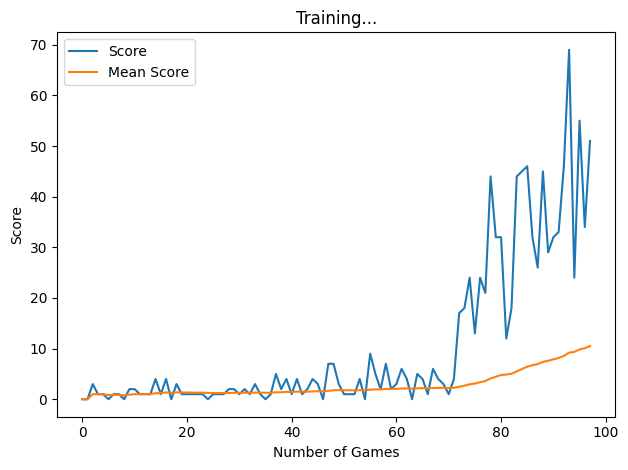

Game 99 | Score 30 | Mean Score: 10.696969696969697 | Record: 69


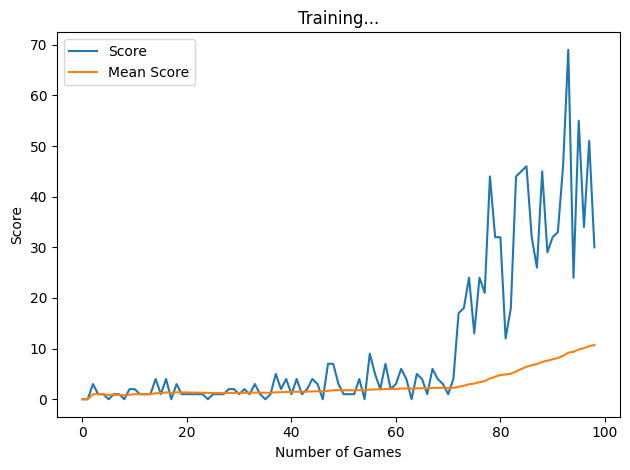

Game 100 | Score 32 | Mean Score: 10.91 | Record: 69


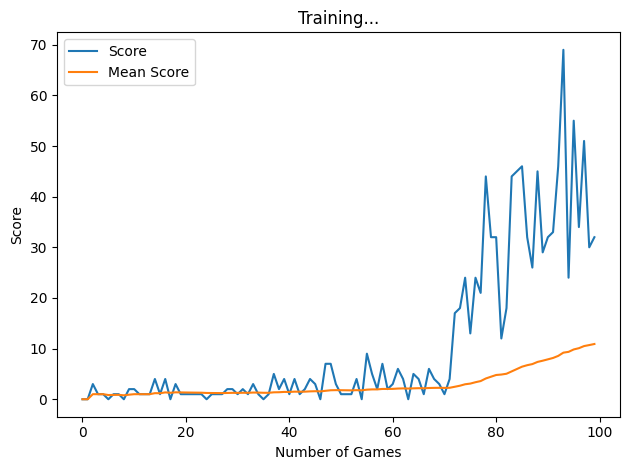

In [5]:
from collections import deque
from os import access
from re import A
from webbrowser import get
from sympy import Line
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
import pygame

MAX_MEMORY = 100_000
BATCH_SIZE = 1000
LR = 0.001
AIgames = 100 # change to change the number of loops the model should train for

pygame.display.quit()
pygame.display.init()

class Agent:
    def __init__(self, load_model=True):
        self.no_games = 0
        self.epsilon = 0
        self.gamma = 0.9
        self.memory = deque(maxlen=MAX_MEMORY)
        self.model = Linear_QNet(11, 256, 3)

        if load_model:
            self.model.load()   # try to load previous model

        self.trainer = QTrainer(self.model, lr=LR, gamma=self.gamma)



    def get_state(self, game):
        head = game.snake[0]
        pointL = Point(head.x - 20, head.y)
        pointR = Point(head.x + 20, head.y)
        pointU = Point(head.x, head.y - 20)
        pointD = Point(head.x, head.y + 20)

        dirL = game.direction == Direction.LEFT
        dirR = game.direction == Direction.RIGHT
        dirU = game.direction == Direction.UP
        dirD = game.direction == Direction.DOWN

        state = [
            # Danger straight
            (dirL and game._is_collision(pointL)) or
            (dirR and game._is_collision(pointR)) or
            (dirU and game._is_collision(pointU)) or
            (dirD and game._is_collision(pointD)), 

            #Danger right
            (dirU and game._is_collision(pointR)) or
            (dirD and game._is_collision(pointL)) or
            (dirL and game._is_collision(pointU)) or
            (dirR and game._is_collision(pointD)),

            #Danger left
            (dirD and game._is_collision(pointR)) or
            (dirU and game._is_collision(pointL)) or
            (dirL and game._is_collision(pointD)) or
            (dirR and game._is_collision(pointU)),


            # Move direction
            dirL,dirR,dirU,dirD, 

            # Food direction
            game.food.x < head.x, game.food.x > head.x, game.food.y < head.y, game.food.y > head.y
        ]
    
        return np.array(state, dtype=int)

    def remember(self, state, action, reward, next_state, game_over):
        self.memory.append((state, action, reward, next_state, game_over)) # popleft if MAX_MEMORY is reached

    def train_long(self):
        if len(self.memory) > BATCH_SIZE:
            mini_sample = random.sample(self.memory, BATCH_SIZE) 
        else:
            mini_sample = self.memory

        states, actions, rewards, next_states, dones = zip(*mini_sample)
        self.trainer.train_step(states, actions, rewards, next_states, dones)
    def train_short(self, state, action, reward, next_state, done):
        self.trainer.train_step(state, action, reward, next_state, done)

    def get_action(self, state):
        self.epsilon = 80 - self.no_games
        finalMove = [0,0,0]
        if random.randint(0, 200) < self.epsilon:
            move = random.randint(0, 2)
            finalMove[move] = 1
        else:
            state0 = torch.tensor(state, dtype =torch.float)
            prediction = self.model(state0)
            move = torch.argmax(prediction).item()
            finalMove[move] = 1

        return finalMove

def plot(scores, nmean):
    if not scores or not nmean:
        return
    plt.clf()
    plt.title('Training...')
    plt.xlabel('Number of Games')
    plt.ylabel('Score')
    plt.plot(scores, label='Score')
    plt.plot(nmean, label='Mean Score')
    plt.legend()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(0.001)

def train():
    plotScores = []
    plotMeanScores = []
    totalScore = 0
    record = 0

    agent = Agent()
    game = SnakeGameAI()

    while agent.no_games < AIgames:
        oldState = agent.get_state(game)
        finalMove = agent.get_action(oldState)

        reward, done, score = game.play_step(finalMove)
        newState = agent.get_state(game)

        agent.train_short(oldState, finalMove, reward, newState, done)
        agent.remember(oldState, finalMove, reward, newState, done)

        if done:
            game.reset()
            agent.no_games += 1
            agent.train_long()

            if score > record:
                record = score
                agent.model.save()

            totalScore += score
            meanScore = totalScore / agent.no_games

            print('Game', agent.no_games, '| Score', score, '| Mean Score:', meanScore, '| Record:', record)

            plotScores.append(score)
            plotMeanScores.append(meanScore)
            plot(plotScores, plotMeanScores)



if __name__ == "__main__":
    train()
    pygame.quit()  # quit only once at the very end
